# 평균 구매빈도수 구하기 (R)

In [61]:
import os
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager,rc

rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False     # 마이너스 부호 깨짐 방지
#현재 폴더 경로; 작업 폴더 기준
print(os.getcwd())

C:\Users\jeoun\Documents\GitHub\study\study\2차 플젝\second_projects


In [2]:
import pandas as pd
purchase_1 = pd.read_csv('생성데이터/purchase1_include_pt.csv', index_col = 0)
purchase_1

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE
0,17218,B,44,8664000,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,20,2420,중가
1,11303,B,44,8664007,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,13,2400,중가
2,13210,B,48,8919520,식품/생활,식품,탄산음료,사이다,일용품,20150921,2015,3,9,19,5250,중가
3,13823,B,12,6956422,식품/생활,식품,탄산음료,사이다,일용품,20140813,2014,3,8,18,2250,중가
4,18970,B,12,6957156,식품/생활,식품,탄산음료,사이다,일용품,20140831,2014,3,8,22,4900,중가
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14265415,15018,C,63,990213,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20151018,2015,4,10,15,11400,중가
14265416,6415,C,417,10193213,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20140928,2014,3,9,13,13818,중가
14265417,15265,C,133,6069525,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20150117,2015,1,1,17,13000,중가
14265418,7962,C,89,1141067,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20150924,2015,3,9,18,8158,중가


In [3]:
purchase_2 = pd.read_csv('생성데이터/purchase2_include_pt.csv', index_col = 0)
purchase_2

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE
14265420,7249,C,200,7252615,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20141116,2014,4,11,18,4497,중가
14265421,3733,C,292,9196569,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20140128,2014,1,1,18,7500,중가
14265422,8710,C,277,8617166,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20141102,2014,4,11,17,22120,중가
14265423,16883,C,475,6641782,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20150321,2015,1,3,23,8990,중가
14265424,5625,C,64,976199,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20150319,2015,1,3,18,17000,중가
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,134,B,16,7269975,식품/생활,식품,전통과자,온라인팥빙수재료,일용품,20141130,2014,4,11,15,8900,저가
28593026,18484,B,26,7946814,가구인테리어/잡화,잡화,여성양말,여성발가락,일용품,20141227,2014,4,12,14,1000,저가
28593027,5043,B,21,7777110,식품/생활,식품,즉석구이안주,즉석쥐포,일용품,20151012,2015,4,10,22,4510,중가
28593028,4073,B,18,7579178,식품/생활,식품,마른안주,온라인 안주,일용품,20140125,2014,1,1,20,8900,중가


In [4]:
purchase_1.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE
0,17218,B,44,8664000,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,20,2420,중가
1,11303,B,44,8664007,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,13,2400,중가
2,13210,B,48,8919520,식품/생활,식품,탄산음료,사이다,일용품,20150921,2015,3,9,19,5250,중가
3,13823,B,12,6956422,식품/생활,식품,탄산음료,사이다,일용품,20140813,2014,3,8,18,2250,중가
4,18970,B,12,6957156,식품/생활,식품,탄산음료,사이다,일용품,20140831,2014,3,8,22,4900,중가


In [5]:
purchase_2.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE
14265420,7249,C,200,7252615,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20141116,2014,4,11,18,4497,중가
14265421,3733,C,292,9196569,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20140128,2014,1,1,18,7500,중가
14265422,8710,C,277,8617166,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20141102,2014,4,11,17,22120,중가
14265423,16883,C,475,6641782,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20150321,2015,1,3,23,8990,중가
14265424,5625,C,64,976199,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20150319,2015,1,3,18,17000,중가


In [6]:
purchase_2.isnull().sum()

CUSTNO             0
ASSO               0
STCODE             0
RNO                0
BBCL               0
BCL                0
MCL                0
SCL                0
TYPE               0
PURDATE            0
PURYEAR            0
QUARTER            0
PURMONTH           0
PURHOUR            0
PURAMT             0
PRICE_TYPE    147745
dtype: int64

In [7]:
purchase_1.isnull().sum()

CUSTNO            0
ASSO              0
STCODE            0
RNO               0
BBCL              0
BCL               0
MCL               0
SCL               0
TYPE              0
PURDATE           0
PURYEAR           0
QUARTER           0
PURMONTH          0
PURHOUR           0
PURAMT            0
PRICE_TYPE    19191
dtype: int64

In [8]:
purchase_1[purchase_1['PRICE_TYPE'].isnull() == True]

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE
2896096,14647,B,44,8744853,의류/이미용,의류,덧신,여성스타킹덧신,일용품,20150615,2015,2,6,18,3900,NaN
2896097,11018,B,19,7662860,의류/이미용,의류,덧신,여성스타킹덧신,일용품,20150523,2015,2,5,20,5700,NaN
2896098,13559,B,45,8787211,의류/이미용,의류,덧신,여성스타킹덧신,일용품,20150601,2015,2,6,13,6800,NaN
2896099,16317,B,45,8787294,의류/이미용,의류,덧신,여성스타킹덧신,일용품,20150604,2015,2,6,12,3800,NaN
2896100,18048,B,46,8828567,의류/이미용,의류,덧신,여성스타킹덧신,일용품,20150724,2015,3,7,23,1900,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10257155,3858,B,44,8738445,의류/이미용,의류,란제리,기능성란제리,일용품,20150512,2015,2,5,21,10000,NaN
10257156,9563,B,28,8063024,의류/이미용,의류,란제리,기능성란제리,일용품,20140215,2014,1,2,17,19900,NaN
10257157,13557,B,25,7894345,의류/이미용,의류,란제리,기능성란제리,일용품,20141203,2014,4,12,21,17900,NaN
10257158,3098,B,41,8575183,의류/이미용,의류,란제리,기능성란제리,일용품,20150203,2015,1,2,17,15700,NaN


In [9]:
purchase_2[purchase_2['PRICE_TYPE'].isnull() == True]

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE
21260711,313,A,1,1294639,의류/이미용,의류,란제리/내의,란제리,일용품,20140128,2014,1,1,16,81700,NaN
21260712,4125,A,32,2613610,의류/이미용,의류,란제리/내의,란제리,일용품,20140827,2014,3,8,17,111000,NaN
21260713,4125,A,32,2613611,의류/이미용,의류,란제리/내의,란제리,일용품,20140827,2014,3,8,17,117800,NaN
21260714,2010,A,20,4393924,의류/이미용,의류,란제리/내의,란제리,일용품,20150526,2015,2,5,11,70300,NaN
21260715,15565,A,20,4393925,의류/이미용,의류,란제리/내의,란제리,일용품,20150526,2015,2,5,13,18000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28592223,2049,A,1,4772296,의류/이미용,의류,란제리/내의,EC(해외잡화),일용품,20150723,2015,3,7,14,42000,NaN
28592224,2888,A,1,4772297,의류/이미용,의류,란제리/내의,EC(해외잡화),일용품,20150723,2015,3,7,17,49000,NaN
28592831,17082,B,116,10563481,의류/이미용,의류,언더웨어행사,아동기타행사,일용품,20150728,2015,3,7,14,8500,NaN
28592970,10062,B,135,11096559,의류/이미용,의류,성인내의,온라인 성인내의,일용품,20141027,2014,4,10,20,6900,NaN


# NULL 값 채우기 (금액타입)

In [10]:
null_idx_1 = purchase_1[purchase_1['PRICE_TYPE'].isnull() == True]
null_idx_2 = purchase_2[purchase_2['PRICE_TYPE'].isnull() == True]

## 함수생성(df, 널값인덱스를 넣으면 널값 채운 df 반환) 

In [11]:
def return_fillnull(purchase_final, null_idx):
    for idx in null_idx:
        if purchase_final.loc[idx]['ASSO'] == 'A' and purchase_final.loc[idx]['MCL'] == '란제리/내의':
            purchase_final.loc[idx,'PRICE_TYPE'] = '고가'
        elif purchase_final.loc[idx]['ASSO'] == 'A' and purchase_final.loc[idx]['MCL'] == '웨딩':
            purchase_final.loc[idx,'PRICE_TYPE'] = '중가'
        elif purchase_final.loc[idx]['ASSO'] == 'B' and purchase_final.loc[idx]['MCL'] in ('성인내의','란제리','스타킹','아동내의','언더웨어행사', '덧신','홈웨어'):
            purchase_final.loc[idx,'PRICE_TYPE'] = '저가'
        elif purchase_final.loc[idx]['ASSO'] == 'B' and purchase_final.loc[idx]['MCL'] == '란제리브랜드':
            purchase_final.loc[idx,'PRICE_TYPE'] = '중가'
    return purchase_final

In [12]:
purchase_n1 = return_fillnull(purchase_1, null_idx_1.index)
purchase_n2 = return_fillnull(purchase_2, null_idx_2.index)

In [13]:
purchase_n1.isnull().sum().sum()

0

In [14]:
purchase_n2.isnull().sum().sum()

0

# [null값 채운 데이터 저장]

In [15]:
purchase_n1.to_csv('purchase_n1_fillna.csv')
purchase_n2.to_csv('purchase_n2_fillna.csv')

In [16]:
purchase_n1['BBCL'].unique()

array(['식품/생활', '침구/주방', '교육문화/아동', '의류/이미용', '가구인테리어/잡화', '가전/레저취미/멀티샵'],
      dtype=object)

In [17]:
purchase_n1.shape

(14127934, 16)

In [18]:
purchase_n2.shape

(14127934, 16)

## 1분기 데이터

In [19]:
purchase_Qn1 = purchase_n1[(purchase_n1['PURYEAR']==2014)&(purchase_n1['QUARTER']==1)]
# purchase_Qn2 = purchase_n2[(purchase_n2['PURYEAR']==2014)&(purchase_n2['QUARTER']==1)]
purchase_Qn1.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE
0,17218,B,44,8664000,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,20,2420,중가
1,11303,B,44,8664007,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,13,2400,중가
26,1310,B,32,8198575,식품/생활,식품,탄산음료,사이다,일용품,20140125,2014,1,1,21,4050,중가
49,11545,B,27,7959782,식품/생활,식품,탄산음료,사이다,일용품,20140113,2014,1,1,13,1200,중가
59,12233,B,66,9338166,식품/생활,식품,탄산음료,사이다,일용품,20140207,2014,1,2,21,1970,중가


In [20]:
purchase_Qn2 = purchase_n2[(purchase_n2['PURYEAR']==2014)&(purchase_n2['QUARTER']==1)]
purchase_Qn2.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE
14265421,3733,C,292,9196569,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20140128,2014,1,1,18,7500,중가
14265428,18230,C,268,8437421,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20140320,2014,1,3,21,13464,중가
14265463,14550,C,69,1028373,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20140224,2014,1,2,18,13007,중가
14265473,5257,C,131,6057789,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20140130,2014,1,1,13,9980,중가
14265476,1082,C,85,1117530,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20140108,2014,1,1,15,8340,중가


In [21]:
purchase_Q1 = pd.concat([purchase_Qn1, purchase_Qn2])

In [22]:
purchase_Q1.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE
0,17218,B,44,8664000,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,20,2420,중가
1,11303,B,44,8664007,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,13,2400,중가
26,1310,B,32,8198575,식품/생활,식품,탄산음료,사이다,일용품,20140125,2014,1,1,21,4050,중가
49,11545,B,27,7959782,식품/생활,식품,탄산음료,사이다,일용품,20140113,2014,1,1,13,1200,중가
59,12233,B,66,9338166,식품/생활,식품,탄산음료,사이다,일용품,20140207,2014,1,2,21,1970,중가


In [23]:
purchase_Q1['PURYEAR'].value_counts()

2014    3211790
Name: PURYEAR, dtype: int64

In [24]:
purchase_Q1['QUARTER'].value_counts()

1    3211790
Name: QUARTER, dtype: int64

In [27]:
purchase_Q1['TOTAL_CAT'] = purchase_Q1['BBCL'] + '_' +purchase_Q1['PRICE_TYPE']

In [28]:
purchase_Q1.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE,TOTAL_CAT
0,17218,B,44,8664000,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,20,2420,중가,식품/생활_중가
1,11303,B,44,8664007,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,13,2400,중가,식품/생활_중가
26,1310,B,32,8198575,식품/생활,식품,탄산음료,사이다,일용품,20140125,2014,1,1,21,4050,중가,식품/생활_중가
49,11545,B,27,7959782,식품/생활,식품,탄산음료,사이다,일용품,20140113,2014,1,1,13,1200,중가,식품/생활_중가
59,12233,B,66,9338166,식품/생활,식품,탄산음료,사이다,일용품,20140207,2014,1,2,21,1970,중가,식품/생활_중가


In [29]:
purchase_Q1['TOTAL_CAT'].value_counts()

식품/생활_중가          1580670
식품/생활_저가           953672
식품/생활_고가           164411
의류/이미용_중가           87297
의류/이미용_저가           81649
가구인테리어/잡화_저가        73397
침구/주방_저가            55811
의류/이미용_고가           42161
교육문화/아동_중가          38780
교육문화/아동_저가          29372
가전/레저취미/멀티샵_중가      24953
가전/레저취미/멀티샵_저가      20056
가구인테리어/잡화_중가        16823
침구/주방_고가            12473
침구/주방_중가            11370
가구인테리어/잡화_고가         8264
가전/레저취미/멀티샵_고가       7396
교육문화/아동_고가           3235
Name: TOTAL_CAT, dtype: int64

In [30]:
len(purchase_Q1['TOTAL_CAT'].value_counts())

18

# [분기별 전체 데이터 저장]

In [32]:
def output_total_2014q(quater):
    purchase_Qn1 = purchase_n1[(purchase_n1['PURYEAR']==2014)&(purchase_n1['QUARTER']==quater)]
    purchase_Qn2 = purchase_n2[(purchase_n2['PURYEAR']==2014)&(purchase_n2['QUARTER']==quater)]

    purchase_Q1 = pd.concat([purchase_Qn1, purchase_Qn2])

    purchase_Q1['TOTAL_CAT'] = purchase_Q1['BBCL'] + '_' +purchase_Q1['PRICE_TYPE']
    print(len(purchase_Q1['TOTAL_CAT'].value_counts()))
    return purchase_Q1

In [34]:
q1 = output_total_2014q(1)
q2 = output_total_2014q(2)
q3 = output_total_2014q(3)
q4 = output_total_2014q(4)

18
18
18
18


In [39]:
q2.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE,TOTAL_CAT
21,14795,B,71,9427551,식품/생활,식품,탄산음료,사이다,일용품,20140408,2014,2,4,20,6400,중가,식품/생활_중가
27,10050,B,34,8345963,식품/생활,식품,탄산음료,사이다,일용품,20140621,2014,2,6,22,2650,중가,식품/생활_중가
52,18080,B,71,9431864,식품/생활,식품,탄산음료,사이다,일용품,20140607,2014,2,6,14,1290,중가,식품/생활_중가
56,16364,B,72,9477508,식품/생활,식품,탄산음료,사이다,일용품,20140604,2014,2,6,21,2650,중가,식품/생활_중가
65,6477,B,32,8211013,식품/생활,식품,탄산음료,사이다,일용품,20140607,2014,2,6,17,1300,중가,식품/생활_중가


In [40]:
q3.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE,TOTAL_CAT
3,13823,B,12,6956422,식품/생활,식품,탄산음료,사이다,일용품,20140813,2014,3,8,18,2250,중가,식품/생활_중가
4,18970,B,12,6957156,식품/생활,식품,탄산음료,사이다,일용품,20140831,2014,3,8,22,4900,중가,식품/생활_중가
31,10757,B,34,8353764,식품/생활,식품,탄산음료,사이다,일용품,20140805,2014,3,8,20,1780,중가,식품/생활_중가
32,18775,B,76,9578488,식품/생활,식품,탄산음료,사이다,일용품,20140710,2014,3,7,22,1250,중가,식품/생활_중가
37,8083,B,36,8460236,식품/생활,식품,탄산음료,사이다,일용품,20140706,2014,3,7,16,1300,중가,식품/생활_중가


In [36]:
def output_total_2015q(quater):
    purchase_Qn1 = purchase_n1[(purchase_n1['PURYEAR']==2015)&(purchase_n1['QUARTER']==quater)]
    purchase_Qn2 = purchase_n2[(purchase_n2['PURYEAR']==2015)&(purchase_n2['QUARTER']==quater)]

    purchase_Q1 = pd.concat([purchase_Qn1, purchase_Qn2])

    purchase_Q1['TOTAL_CAT'] = purchase_Q1['BBCL'] + '_' +purchase_Q1['PRICE_TYPE']
    print(len(purchase_Q1['TOTAL_CAT'].value_counts()))
    return purchase_Q1

In [37]:
q5 = output_total_2015q(1)
q6 = output_total_2015q(2)
q7 = output_total_2015q(3)
q8 = output_total_2015q(4)

18
18
18
18


In [44]:
q8.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE,TOTAL_CAT
9,2492,B,44,8767387,식품/생활,식품,탄산음료,사이다,일용품,20151023,2015,4,10,14,600,중가,식품/생활_중가
15,10474,B,26,7957189,식품/생활,식품,탄산음료,사이다,일용품,20151116,2015,4,11,22,1980,중가,식품/생활_중가
17,12059,B,21,7778593,식품/생활,식품,탄산음료,사이다,일용품,20151124,2015,4,11,20,1100,중가,식품/생활_중가
18,13778,B,36,8490944,식품/생활,식품,탄산음료,사이다,일용품,20151020,2015,4,10,18,1380,중가,식품/생활_중가
44,6271,B,68,9383318,식품/생활,식품,탄산음료,사이다,일용품,20151227,2015,4,12,14,1200,중가,식품/생활_중가


In [45]:
q1.to_csv('total_Q1.csv')
q2.to_csv('total_Q2.csv')
q3.to_csv('total_Q3.csv')
q4.to_csv('total_Q4.csv')
q5.to_csv('total_Q5.csv')
q6.to_csv('total_Q6.csv')
q7.to_csv('total_Q7.csv')
q8.to_csv('total_Q8.csv')

# [분기별 데이터 불러오기]

In [1]:
import pandas as pd

q1 = pd.read_csv("C:/Users/jeoun/Documents/GitHub/study/study/2차 플젝\정현's 데이터/total_Q1.csv", index_col = 0)
q1.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE,TOTAL_CAT
0,17218,B,44,8664000,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,20,2420,중가,식품/생활_중가
1,11303,B,44,8664007,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,13,2400,중가,식품/생활_중가
26,1310,B,32,8198575,식품/생활,식품,탄산음료,사이다,일용품,20140125,2014,1,1,21,4050,중가,식품/생활_중가
49,11545,B,27,7959782,식품/생활,식품,탄산음료,사이다,일용품,20140113,2014,1,1,13,1200,중가,식품/생활_중가
59,12233,B,66,9338166,식품/생활,식품,탄산음료,사이다,일용품,20140207,2014,1,2,21,1970,중가,식품/생활_중가


In [2]:
q2 = pd.read_csv("C:/Users/jeoun/Documents/GitHub/study/study/2차 플젝\정현's 데이터/total_Q2.csv", index_col = 0)
q2.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE,TOTAL_CAT
21,14795,B,71,9427551,식품/생활,식품,탄산음료,사이다,일용품,20140408,2014,2,4,20,6400,중가,식품/생활_중가
27,10050,B,34,8345963,식품/생활,식품,탄산음료,사이다,일용품,20140621,2014,2,6,22,2650,중가,식품/생활_중가
52,18080,B,71,9431864,식품/생활,식품,탄산음료,사이다,일용품,20140607,2014,2,6,14,1290,중가,식품/생활_중가
56,16364,B,72,9477508,식품/생활,식품,탄산음료,사이다,일용품,20140604,2014,2,6,21,2650,중가,식품/생활_중가
65,6477,B,32,8211013,식품/생활,식품,탄산음료,사이다,일용품,20140607,2014,2,6,17,1300,중가,식품/생활_중가


In [3]:
q3 = pd.read_csv("C:/Users/jeoun/Documents/GitHub/study/study/2차 플젝\정현's 데이터/total_Q3.csv", index_col = 0)
q3.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE,TOTAL_CAT
3,13823,B,12,6956422,식품/생활,식품,탄산음료,사이다,일용품,20140813,2014,3,8,18,2250,중가,식품/생활_중가
4,18970,B,12,6957156,식품/생활,식품,탄산음료,사이다,일용품,20140831,2014,3,8,22,4900,중가,식품/생활_중가
31,10757,B,34,8353764,식품/생활,식품,탄산음료,사이다,일용품,20140805,2014,3,8,20,1780,중가,식품/생활_중가
32,18775,B,76,9578488,식품/생활,식품,탄산음료,사이다,일용품,20140710,2014,3,7,22,1250,중가,식품/생활_중가
37,8083,B,36,8460236,식품/생활,식품,탄산음료,사이다,일용품,20140706,2014,3,7,16,1300,중가,식품/생활_중가


In [4]:
q4 = pd.read_csv("C:/Users/jeoun/Documents/GitHub/study/study/2차 플젝\정현's 데이터/total_Q4.csv", index_col = 0)
q4.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE,TOTAL_CAT
33,15586,B,88,9893006,식품/생활,식품,탄산음료,사이다,일용품,20141027,2014,4,10,14,1680,중가,식품/생활_중가
36,16855,B,70,9405240,식품/생활,식품,탄산음료,사이다,일용품,20141018,2014,4,10,17,1680,중가,식품/생활_중가
39,13159,B,27,7994345,식품/생활,식품,탄산음료,사이다,일용품,20141005,2014,4,10,18,1760,중가,식품/생활_중가
50,12384,B,50,8942554,식품/생활,식품,탄산음료,사이다,일용품,20141205,2014,4,12,15,990,중가,식품/생활_중가
54,13324,B,44,8715571,식품/생활,식품,탄산음료,사이다,일용품,20141228,2014,4,12,19,1390,중가,식품/생활_중가


In [5]:
q5 = pd.read_csv("C:/Users/jeoun/Documents/GitHub/study/study/2차 플젝\정현's 데이터/total_Q5.csv", index_col = 0)
q5.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE,TOTAL_CAT
8,15777,B,68,9376528,식품/생활,식품,탄산음료,사이다,일용품,20150319,2015,1,3,16,2760,중가,식품/생활_중가
12,17942,B,52,8988881,식품/생활,식품,탄산음료,사이다,일용품,20150218,2015,1,2,13,1740,중가,식품/생활_중가
19,6232,B,8,6713683,식품/생활,식품,탄산음료,사이다,일용품,20150121,2015,1,1,13,1280,중가,식품/생활_중가
20,13793,B,12,6962245,식품/생활,식품,탄산음료,사이다,일용품,20150108,2015,1,1,11,980,중가,식품/생활_중가
30,9155,B,11,6909383,식품/생활,식품,탄산음료,사이다,일용품,20150118,2015,1,1,22,1280,중가,식품/생활_중가


In [6]:
q6 = pd.read_csv("C:/Users/jeoun/Documents/GitHub/study/study/2차 플젝\정현's 데이터/total_Q6.csv", index_col = 0)
q6.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE,TOTAL_CAT
5,15642,B,9,6817184,식품/생활,식품,탄산음료,사이다,일용품,20150607,2015,2,6,22,2180,중가,식품/생활_중가
7,4996,B,68,9378229,식품/생활,식품,탄산음료,사이다,일용품,20150524,2015,2,5,17,1960,중가,식품/생활_중가
13,17317,B,126,10743578,식품/생활,식품,탄산음료,사이다,일용품,20150401,2015,2,4,19,4730,중가,식품/생활_중가
14,6539,B,52,8997589,식품/생활,식품,탄산음료,사이다,일용품,20150522,2015,2,5,20,2500,중가,식품/생활_중가
22,7791,B,94,10072715,식품/생활,식품,탄산음료,사이다,일용품,20150519,2015,2,5,21,990,중가,식품/생활_중가


In [7]:
q7 = pd.read_csv("C:/Users/jeoun/Documents/GitHub/study/study/2차 플젝\정현's 데이터/total_Q7.csv", index_col = 0)
q7.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE,TOTAL_CAT
2,13210,B,48,8919520,식품/생활,식품,탄산음료,사이다,일용품,20150921,2015,3,9,19,5250,중가,식품/생활_중가
6,7240,B,75,9571864,식품/생활,식품,탄산음료,사이다,일용품,20150914,2015,3,9,17,680,중가,식품/생활_중가
10,15946,B,52,9005896,식품/생활,식품,탄산음료,사이다,일용품,20150817,2015,3,8,12,550,중가,식품/생활_중가
11,16824,B,52,9006111,식품/생활,식품,탄산음료,사이다,일용품,20150819,2015,3,8,16,550,중가,식품/생활_중가
16,11493,B,83,9783321,식품/생활,식품,탄산음료,사이다,일용품,20150827,2015,3,8,21,2680,중가,식품/생활_중가


In [8]:
q8 = pd.read_csv("C:/Users/jeoun/Documents/GitHub/study/study/2차 플젝\정현's 데이터/total_Q8.csv", index_col = 0)
q8.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE,TOTAL_CAT
9,2492,B,44,8767387,식품/생활,식품,탄산음료,사이다,일용품,20151023,2015,4,10,14,600,중가,식품/생활_중가
15,10474,B,26,7957189,식품/생활,식품,탄산음료,사이다,일용품,20151116,2015,4,11,22,1980,중가,식품/생활_중가
17,12059,B,21,7778593,식품/생활,식품,탄산음료,사이다,일용품,20151124,2015,4,11,20,1100,중가,식품/생활_중가
18,13778,B,36,8490944,식품/생활,식품,탄산음료,사이다,일용품,20151020,2015,4,10,18,1380,중가,식품/생활_중가
44,6271,B,68,9383318,식품/생활,식품,탄산음료,사이다,일용품,20151227,2015,4,12,14,1200,중가,식품/생활_중가


## [연습]

1. 해당 분기 데이터 <br>
2. 해당 고객 데이터 <br>
3. 해당 카테고리 데이터 <br>
4. 구매 날짜 내림차순 정렬 후 (중복 날짜 제거) 두 날짜간 차이 <br>
5. 구한 날짜간 차이들의 평균 값 = 빈도수 <br>

##### 1. 해당 분기 데이터 : 1분기 

In [46]:
q1.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE,TOTAL_CAT
0,17218,B,44,8664000,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,20,2420,중가,식품/생활_중가
1,11303,B,44,8664007,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,13,2400,중가,식품/생활_중가
26,1310,B,32,8198575,식품/생활,식품,탄산음료,사이다,일용품,20140125,2014,1,1,21,4050,중가,식품/생활_중가
49,11545,B,27,7959782,식품/생활,식품,탄산음료,사이다,일용품,20140113,2014,1,1,13,1200,중가,식품/생활_중가
59,12233,B,66,9338166,식품/생활,식품,탄산음료,사이다,일용품,20140207,2014,1,2,21,1970,중가,식품/생활_중가


In [66]:
# 전체
df_cust = q1[q1['CUSTNO']==1]
cat_date1 = df_cust['PURDATE'].unique().tolist()
cat_date1.sort(reverse=True)
print(cat_date1)
date_li = []
for day_ind in range(len(cat_date1)-1):
    day_after = cat_date1[day_ind]
    day_before = cat_date1[day_ind + 1]
    
    # 다음구매일 - 전구매일
    date = datetime.strptime(str(day_after),'%Y%m%d') - datetime.strptime(str(day_before),'%Y%m%d')
    
    date_li.append(date.days)
# 평균 구매일    
print(date_li)
sum(date_li)/len(date_li)

[20140330, 20140326, 20140325, 20140324, 20140321, 20140319, 20140318, 20140305, 20140228, 20140227, 20140221, 20140218, 20140212, 20140207, 20140203, 20140130, 20140128, 20140125, 20140124, 20140123, 20140120, 20140118, 20140117, 20140115, 20140114, 20140113, 20140108]
[4, 1, 1, 3, 2, 1, 13, 5, 1, 6, 3, 6, 5, 4, 4, 2, 3, 1, 1, 3, 2, 1, 2, 1, 1, 5]


3.1153846153846154

##### 카테고리별 확인

###### 고객별 index

In [9]:
cust_li = q1['CUSTNO'].unique().tolist()
cust_li.sort()
len(cust_li)

18866

In [10]:
cate_li = q1['TOTAL_CAT'].unique().tolist()
cate_li.sort()
cate_li

['가구인테리어/잡화_고가',
 '가구인테리어/잡화_저가',
 '가구인테리어/잡화_중가',
 '가전/레저취미/멀티샵_고가',
 '가전/레저취미/멀티샵_저가',
 '가전/레저취미/멀티샵_중가',
 '교육문화/아동_고가',
 '교육문화/아동_저가',
 '교육문화/아동_중가',
 '식품/생활_고가',
 '식품/생활_저가',
 '식품/생활_중가',
 '의류/이미용_고가',
 '의류/이미용_저가',
 '의류/이미용_중가',
 '침구/주방_고가',
 '침구/주방_저가',
 '침구/주방_중가']

In [11]:
df_t = pd.DataFrame(index = cust_li, columns = cate_li)
df_t.shape

(18866, 18)

## 5명만 해보기

In [14]:
# 카테고리
for cate in cate_li:
    cate_df = q1[q1['TOTAL_CAT']==cate]
    
    cust_li = cate_df['CUSTNO'].unique().tolist()
    cust_li.sort()
    
    for cust in [1, 2, 3, 4, 5]:
        cust_df = cate_df[cate_df['CUSTNO']==cust]
        
        cat_date = cust_df['PURDATE'].unique().tolist()
        cat_date.sort(reverse=True)
        
        if len(cat_date) == 0:
            pass
        elif len(cat_date) == 1:
            mean_date = 'just_one'
            df_t.loc[cust, cate] = mean_date
        else:
            date_li = []
            for day_ind in range(len(cat_date)-1):
                day_after = cat_date[day_ind]
                day_before = cat_date[day_ind + 1]

                # 다음구매일 - 전구매일
                date = datetime.strptime(str(day_after),'%Y%m%d') - datetime.strptime(str(day_before),'%Y%m%d')

                date_li.append(date.days)
            # 평균 구매일    
            mean_date = sum(date_li) / len(date_li)

            df_t.loc[cust, cate] = mean_date
df_t.head()

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
1,NaN,10.25,NaN,33.0,NaN,just_one,NaN,NaN,just_one,12.5,NaN,5.133333,6.888889,NaN,6.875,just_one,NaN,5.0
2,NaN,8.125,just_one,26.666667,just_one,NaN,NaN,NaN,just_one,9.555556,NaN,3.071429,7.272727,NaN,30.5,14.2,NaN,78.0
3,NaN,7.909091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,just_one,1.74,5.714286,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,8.666667,just_one,NaN,NaN,just_one,NaN,NaN,NaN,just_one,13.5,3.652174,just_one,3.0,28.0,NaN,NaN,just_one
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333,2.542857,2.076923,18.0,9.0,19.0,NaN,5.0,just_one


[확인]

In [35]:
df_cust = q1[q1['CUSTNO']==1]
t_df_cat1 = df_cust[df_cust['TOTAL_CAT'] == '의류/이미용_고가']
cat_date1 = t_df_cat1['PURDATE'].unique().tolist()
cat_date1.sort(reverse=True)
print(cat_date1)
date_li = []
for day_ind in range(len(cat_date1)-1):
    day_after = cat_date1[day_ind]
    day_before = cat_date1[day_ind + 1]
    
    # 다음구매일 - 전구매일
    date = datetime.strptime(str(day_after),'%Y%m%d') - datetime.strptime(str(day_before),'%Y%m%d')
    
    date_li.append(date.days)
# 평균 구매일    
print(date_li)
sum(date_li)/len(date_li)

[20140321, 20140318, 20140228, 20140221, 20140218, 20140207, 20140130, 20140124, 20140123, 20140118]
[3, 18, 7, 3, 11, 8, 6, 1, 5]


6.888888888888889

In [ ]:
from datetime import datetime

for cust in cust_li:
    for cate in cate_li:
        cust_df = q1[(q1['CUSTNO']==cust)&(q1['TOTAL_CAT']==cate)]

        cat_date = cust_df['PURDATE'].unique().tolist()
        cat_date.sort(reverse=True)
        
        if len(cat_date) == 0:
            pass
        elif len(cat_date) == 1:
            mean_date = 'just_one'
            df_t.loc[cust, cate] = mean_date
        else:
            date_li = []
            for day_ind in range(len(cat_date)-1):
                day_after = cat_date[day_ind]
                day_before = cat_date[day_ind + 1]

                # 다음구매일 - 전구매일
                date = datetime.strptime(str(day_after),'%Y%m%d') - datetime.strptime(str(day_before),'%Y%m%d')

                date_li.append(date.days)
            # 평균 구매일    
            mean_date = sum(date_li) / len(date_li)

            df_t.loc[cust, cate] = mean_date
df_t.head()

# [함수] : 카테고리별 분기별 고객별 평균구매주기 데이터

In [108]:
from datetime import datetime

def out_q_df(df):
    # 고객
    cust_li = df['CUSTNO'].unique().tolist()
    cust_li.sort()
    # 카테고리
    cate_li = df['TOTAL_CAT'].unique().tolist()
    cate_li.sort()
    
    # 최종 df 
    df_t = pd.DataFrame(index = cust_li, columns = cate_li)
    
    # 고객별, 카테고리별 df 반출
    for cate in cate_li:
        cate_df = df[df['TOTAL_CAT']==cate]
        
        # 고객리스트
        cust_li_ = cate_df['CUSTNO'].unique().tolist()
        cust_li_.sort()
        
        for cust in cust_li_:
            cust_df = cate_df[cate_df['CUSTNO']==cust]

            cat_date = cust_df['PURDATE'].unique().tolist()
            cat_date.sort(reverse=True)

            if len(cat_date) == 0:
                pass
            elif len(cat_date) == 1:
                mean_date = -1 #'just_one'
                df_t.loc[cust, cate] = mean_date
            else:
                date_li = []
                for day_ind in range(len(cat_date)-1):
                    day_after = cat_date[day_ind]
                    day_before = cat_date[day_ind + 1]

                    # 다음구매일 - 전구매일
                    date = datetime.strptime(str(day_after),'%Y%m%d') - datetime.strptime(str(day_before),'%Y%m%d')

                    date_li.append(date.days)
                # 평균 구매일    
                mean_date = sum(date_li) / len(date_li)

                df_t.loc[cust, cate] = mean_date
    return df_t

In [109]:
# 전체
def out_q_total_df(q_df, add_df):
    
    # 고객리스트
    for cust in q_df['CUSTNO'].unique().tolist():
        cust_df = q_df[q_df['CUSTNO']==cust]

        cat_date = cust_df['PURDATE'].unique().tolist()
        cat_date.sort(reverse=True)

        if len(cat_date) == 0:
            pass
        elif len(cat_date) == 1:
            mean_date = -1 #'just_one'
            add_df.loc[cust, '총 평균 구매주기'] = mean_date
        else:
            date_li = []
            for day_ind in range(len(cat_date)-1):
                day_after = cat_date[day_ind]
                day_before = cat_date[day_ind + 1]

                # 다음구매일 - 전구매일
                date = datetime.strptime(str(day_after),'%Y%m%d') - datetime.strptime(str(day_before),'%Y%m%d')

                date_li.append(date.days)
            # 평균 구매일    
            mean_date = sum(date_li) / len(date_li)

            add_df.loc[cust, '총 평균 구매주기'] = mean_date
    return add_df

[함수 적용]

#### 1분기

In [110]:
Q_1 = out_q_df(q1)

In [111]:
Q_1.head()

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
1,NaN,10.25,NaN,33.0,NaN,-1,NaN,NaN,-1,12.5,NaN,5.133333,6.888889,NaN,6.875,-1,NaN,5.0
2,NaN,8.125,-1,26.666667,-1,NaN,NaN,NaN,-1,9.555556,NaN,3.071429,7.272727,NaN,30.5,14.2,NaN,78.0
3,NaN,7.909091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.74,5.714286,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,8.666667,-1,NaN,NaN,-1,NaN,NaN,NaN,-1,13.5,3.652174,-1,3.0,28.0,NaN,NaN,-1
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333,2.542857,2.076923,18.0,9.0,19.0,NaN,5.0,-1


In [112]:
Q_1.shape

(18866, 18)

In [113]:
Q_1['가구인테리어/잡화_고가'].value_counts()

-1.000000     1874
 7.000000       48
 1.000000       47
 6.000000       44
 14.000000      38
              ... 
 8.777778        1
 4.444444        1
 6.714286        1
 15.333333       1
 7.333333        1
Name: 가구인테리어/잡화_고가, Length: 265, dtype: int64

In [114]:
Q_1.fillna(0)

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
1,0.0,10.250000,0.0,33.000000,0.0,-1.0,0.0,0.0,-1.00,12.500000,0.000000,5.133333,6.888889,0.0,6.875,-1.0,0.000000,5.0
2,0.0,8.125000,-1.0,26.666667,-1.0,0.0,0.0,0.0,-1.00,9.555556,0.000000,3.071429,7.272727,0.0,30.500,14.2,0.000000,78.0
3,0.0,7.909091,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,-1.000000,1.740000,5.714286,0.000000,0.0,0.000,0.0,0.000000,0.0
4,0.0,8.666667,-1.0,0.000000,0.0,-1.0,0.0,0.0,0.00,-1.000000,13.500000,3.652174,-1.000000,3.0,28.000,0.0,0.000000,-1.0
6,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,13.333333,2.542857,2.076923,18.000000,9.0,19.000,0.0,5.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,-1.0,12.00,2.500000,2.400000,1.111111,0.000000,0.0,-1.000,0.0,3.333333,0.0
19334,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,-1.0,-1.00,0.000000,2.300000,1.666667,0.000000,4.0,0.000,0.0,0.000000,0.0
19335,0.0,8.000000,0.0,0.000000,0.0,0.0,10.0,1.0,4.75,4.600000,3.400000,2.300000,0.000000,15.0,0.000,0.0,3.000000,0.0
19336,0.0,0.000000,0.0,0.000000,0.0,-1.0,0.0,0.0,0.00,0.000000,0.000000,4.666667,0.000000,0.0,0.000,0.0,0.000000,0.0


# [함수 : 그래프 확인]

 0.000000     15505
-1.000000      1874
 7.000000        48
 1.000000        47
 6.000000        44
              ...  
 8.777778         1
 4.444444         1
 6.714286         1
 15.333333        1
 7.333333         1
Name: 가구인테리어/잡화_고가, Length: 266, dtype: int64
-1.000000     3457
 0.000000     3433
 21.000000     207
 14.000000     203
 12.000000     199
              ... 
 3.833333        1
 5.214286        1
 3.950000        1
 2.046512        1
 2.538462        1
Name: 가구인테리어/잡화_저가, Length: 620, dtype: int64
 0.000000     11839
-1.000000      3634
 1.000000        94
 21.000000       82
 14.000000       78
              ...  
 2.250000         1
 6.750000         1
 9.250000         1
 1.435484         1
 3.200000         1
Name: 가구인테리어/잡화_중가, Length: 312, dtype: int64
 0.000000     16314
-1.000000      1381
 1.000000        57
 2.000000        33
 4.000000        28
              ...  
 5.285714         1
 13.400000        1
 71.000000        1
 15.200000        1
 6.250000    

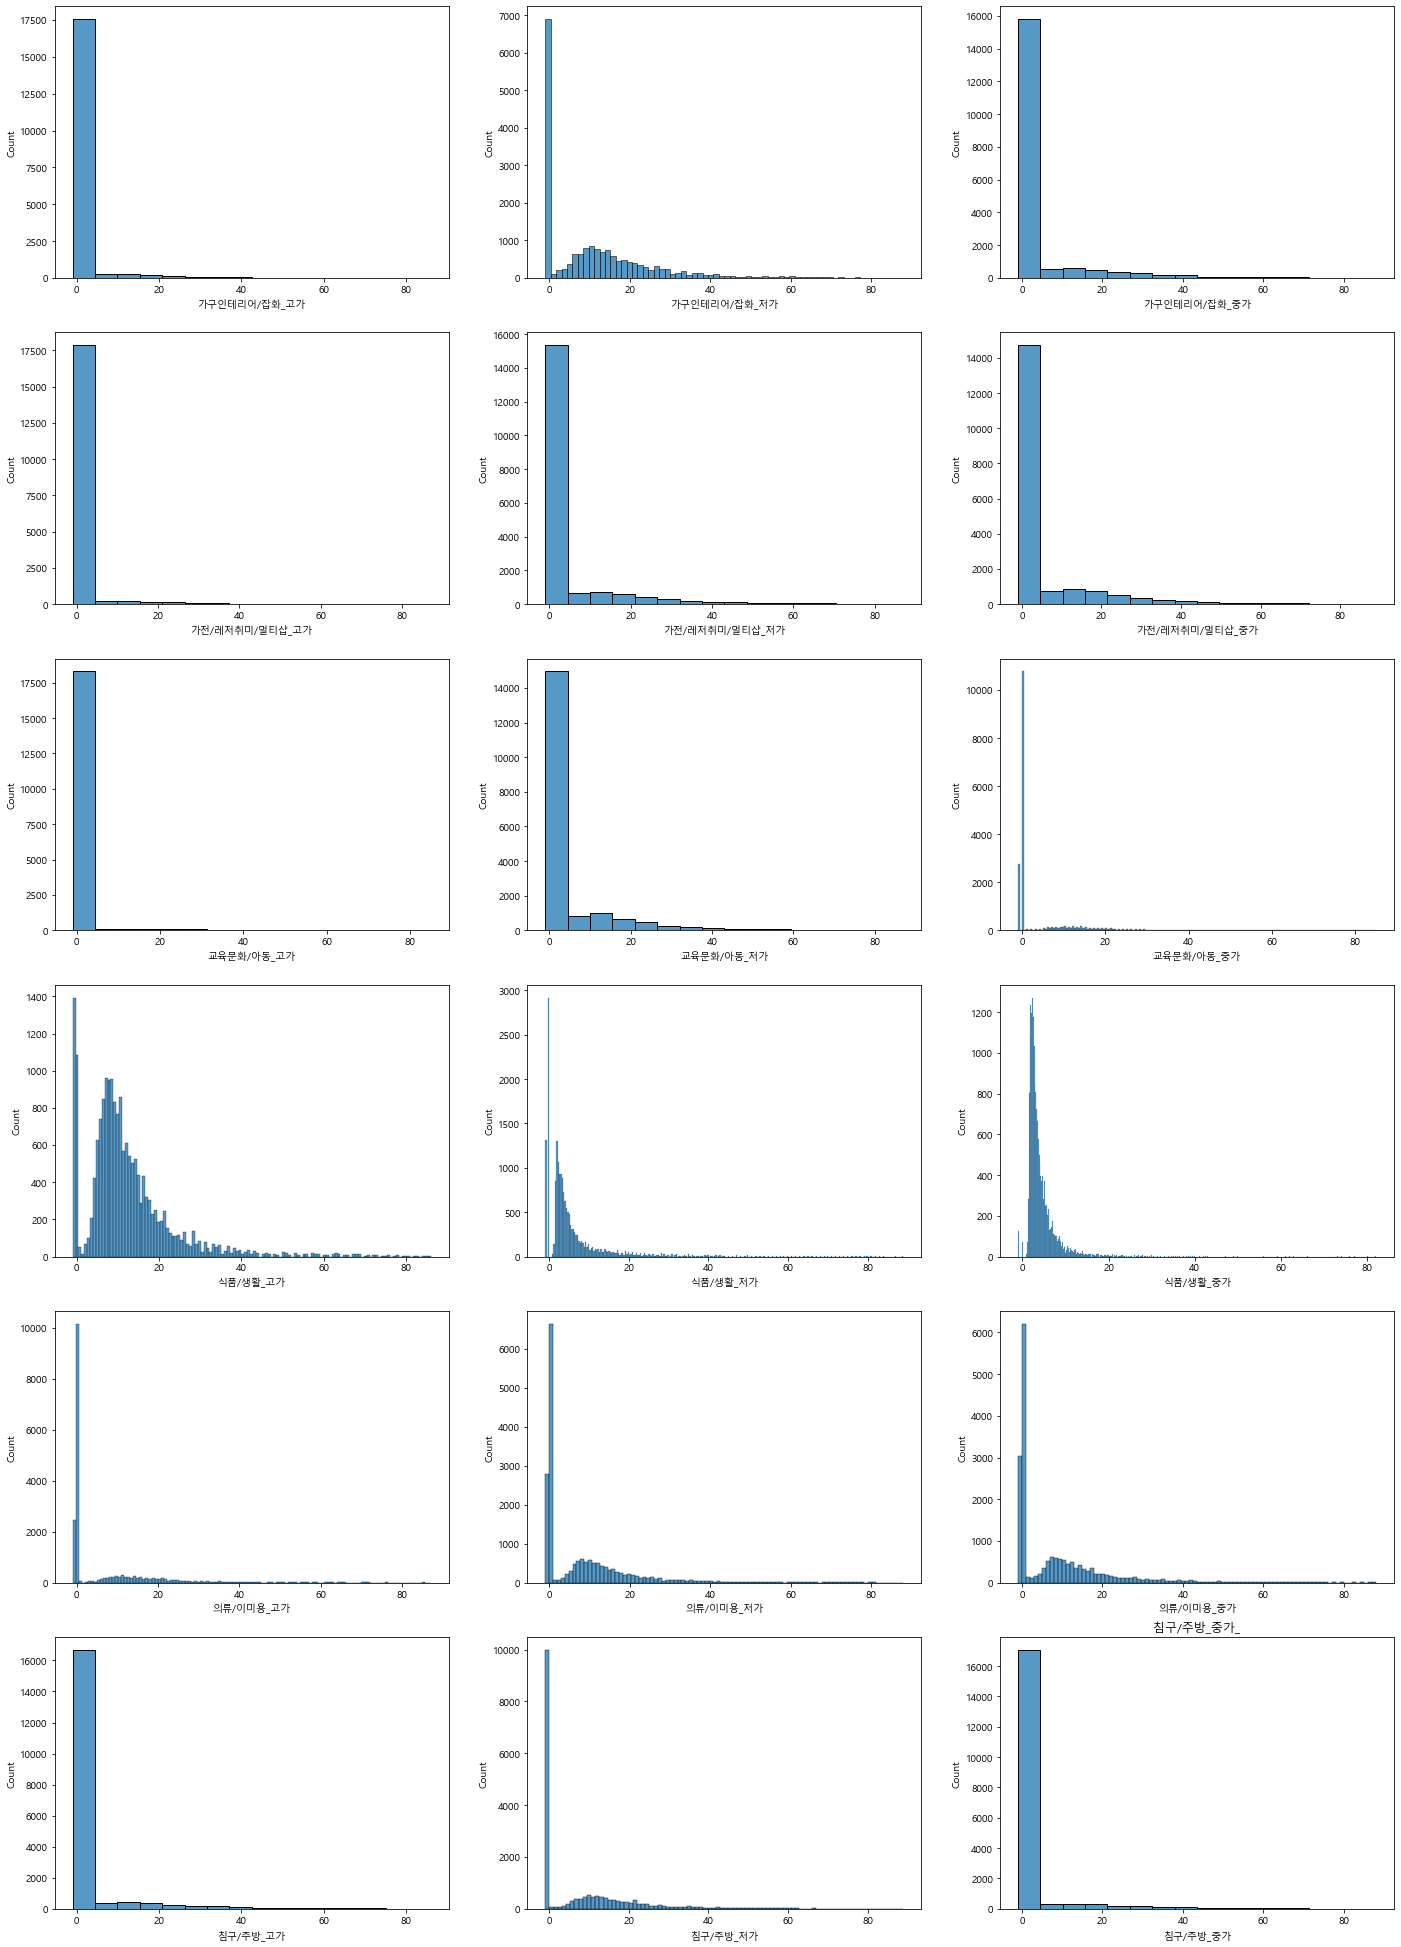

In [115]:
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# 함수 생성
def hist_features(df):
    
    fig, axs = plt.subplots(figsize = (24, 35), nrows = 6, ncols = 3) #6행 3열

    for index_, feature in enumerate(df.columns):
        # null 값 0으로 채우기
        df_ = df.fillna(0)
        
        nrows = index_%3
        ncols = index_//3
        sns.histplot(df_[feature], ax = axs[ncols][nrows])
        plt.title(f'{feature}_')
        print(df_[feature].value_counts())
hist_features(Q_1)

In [116]:
# 총 구매

In [117]:
R_total_Q1 = out_q_total_df(q1, Q_1)
R_total_Q1

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가,총 평균 구매주기
1,NaN,10.25,NaN,33.0,NaN,-1,NaN,NaN,-1,12.5,NaN,5.133333,6.888889,NaN,6.875,-1,NaN,5.0,3.115385
2,NaN,8.125,-1,26.666667,-1,NaN,NaN,NaN,-1,9.555556,NaN,3.071429,7.272727,NaN,30.5,14.2,NaN,78.0,2.230769
3,NaN,7.909091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.74,5.714286,NaN,NaN,NaN,NaN,NaN,NaN,1.705882
4,NaN,8.666667,-1,NaN,NaN,-1,NaN,NaN,NaN,-1,13.5,3.652174,-1,3.0,28.0,NaN,NaN,-1,3.000000
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333,2.542857,2.076923,18.0,9.0,19.0,NaN,5.0,-1,1.780000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1,12.0,2.5,2.4,1.111111,NaN,NaN,-1,NaN,3.333333,NaN,1.111111
19334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,2.3,1.666667,NaN,4.0,NaN,NaN,NaN,NaN,1.562500
19335,NaN,8.0,NaN,NaN,NaN,NaN,10.0,1.0,4.75,4.6,3.4,2.3,NaN,15.0,NaN,NaN,3.0,NaN,2.090909
19336,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,4.666667,NaN,NaN,NaN,NaN,NaN,NaN,3.500000


2.000000     219
3.000000     141
2.095238     119
4.000000     118
2.256410     111
            ... 
3.533333       1
5.083333       1
1.806452       1
10.333333      1
2.090909       1
Name: 총 평균 구매주기, Length: 1167, dtype: int64


<AxesSubplot:xlabel='총 평균 구매주기', ylabel='Count'>

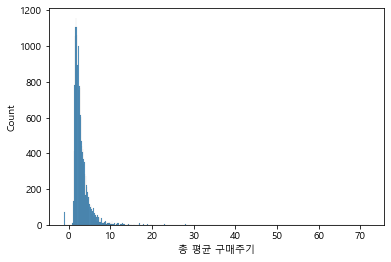

In [118]:
print(R_total_Q1['총 평균 구매주기'].value_counts())
sns.histplot(R_total_Q1['총 평균 구매주기'])

#### 2분기

In [119]:
Q_2 = out_q_df(q2)

In [120]:
Q_2.head()

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
1,NaN,13.0,12.6,12.2,NaN,NaN,NaN,NaN,-1,5.571429,1.0,4.285714,12.857143,NaN,7.4,NaN,NaN,NaN
2,NaN,7.8,57.0,14.0,NaN,47.0,NaN,NaN,29.0,7.166667,NaN,3.071429,4.0,NaN,6.5,22.5,NaN,40.0
3,NaN,3.178571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,1.607143,3.73913,NaN,NaN,-1,NaN,NaN,NaN
4,NaN,24.333333,52.0,-1,-1,-1,NaN,NaN,NaN,16.4,6.363636,2.472222,13.25,-1,9.2,NaN,-1,NaN
6,-1,15.25,22.0,NaN,-1,NaN,NaN,NaN,NaN,11.0,3.103448,2.368421,25.666667,7.857143,7.6,31.0,17.5,NaN


 0.000000     14880
-1.000000      2084
 1.000000        75
 2.000000        49
 21.000000       42
              ...  
 22.250000        1
 7.428571         1
 10.400000        1
 10.875000        1
 17.600000        1
Name: 가구인테리어/잡화_고가, Length: 306, dtype: int64
-1.000000     3286
 0.000000     3209
 14.000000     244
 13.000000     184
 11.000000     179
              ... 
 1.679245        1
 3.750000        1
 1.977273        1
 1.913043        1
 4.866667        1
Name: 가구인테리어/잡화_저가, Length: 640, dtype: int64
 0.000000     10681
-1.000000      3631
 14.000000      129
 1.000000       115
 7.000000        97
              ...  
 6.250000         1
 11.400000        1
 5.058824         1
 11.125000        1
 3.272727         1
Name: 가구인테리어/잡화_중가, Length: 374, dtype: int64
 0.000000     15632
-1.000000      1470
 1.000000        59
 7.000000        46
 2.000000        42
              ...  
 9.800000         1
 10.875000        1
 4.750000         1
 10.833333        1
 3.384615    

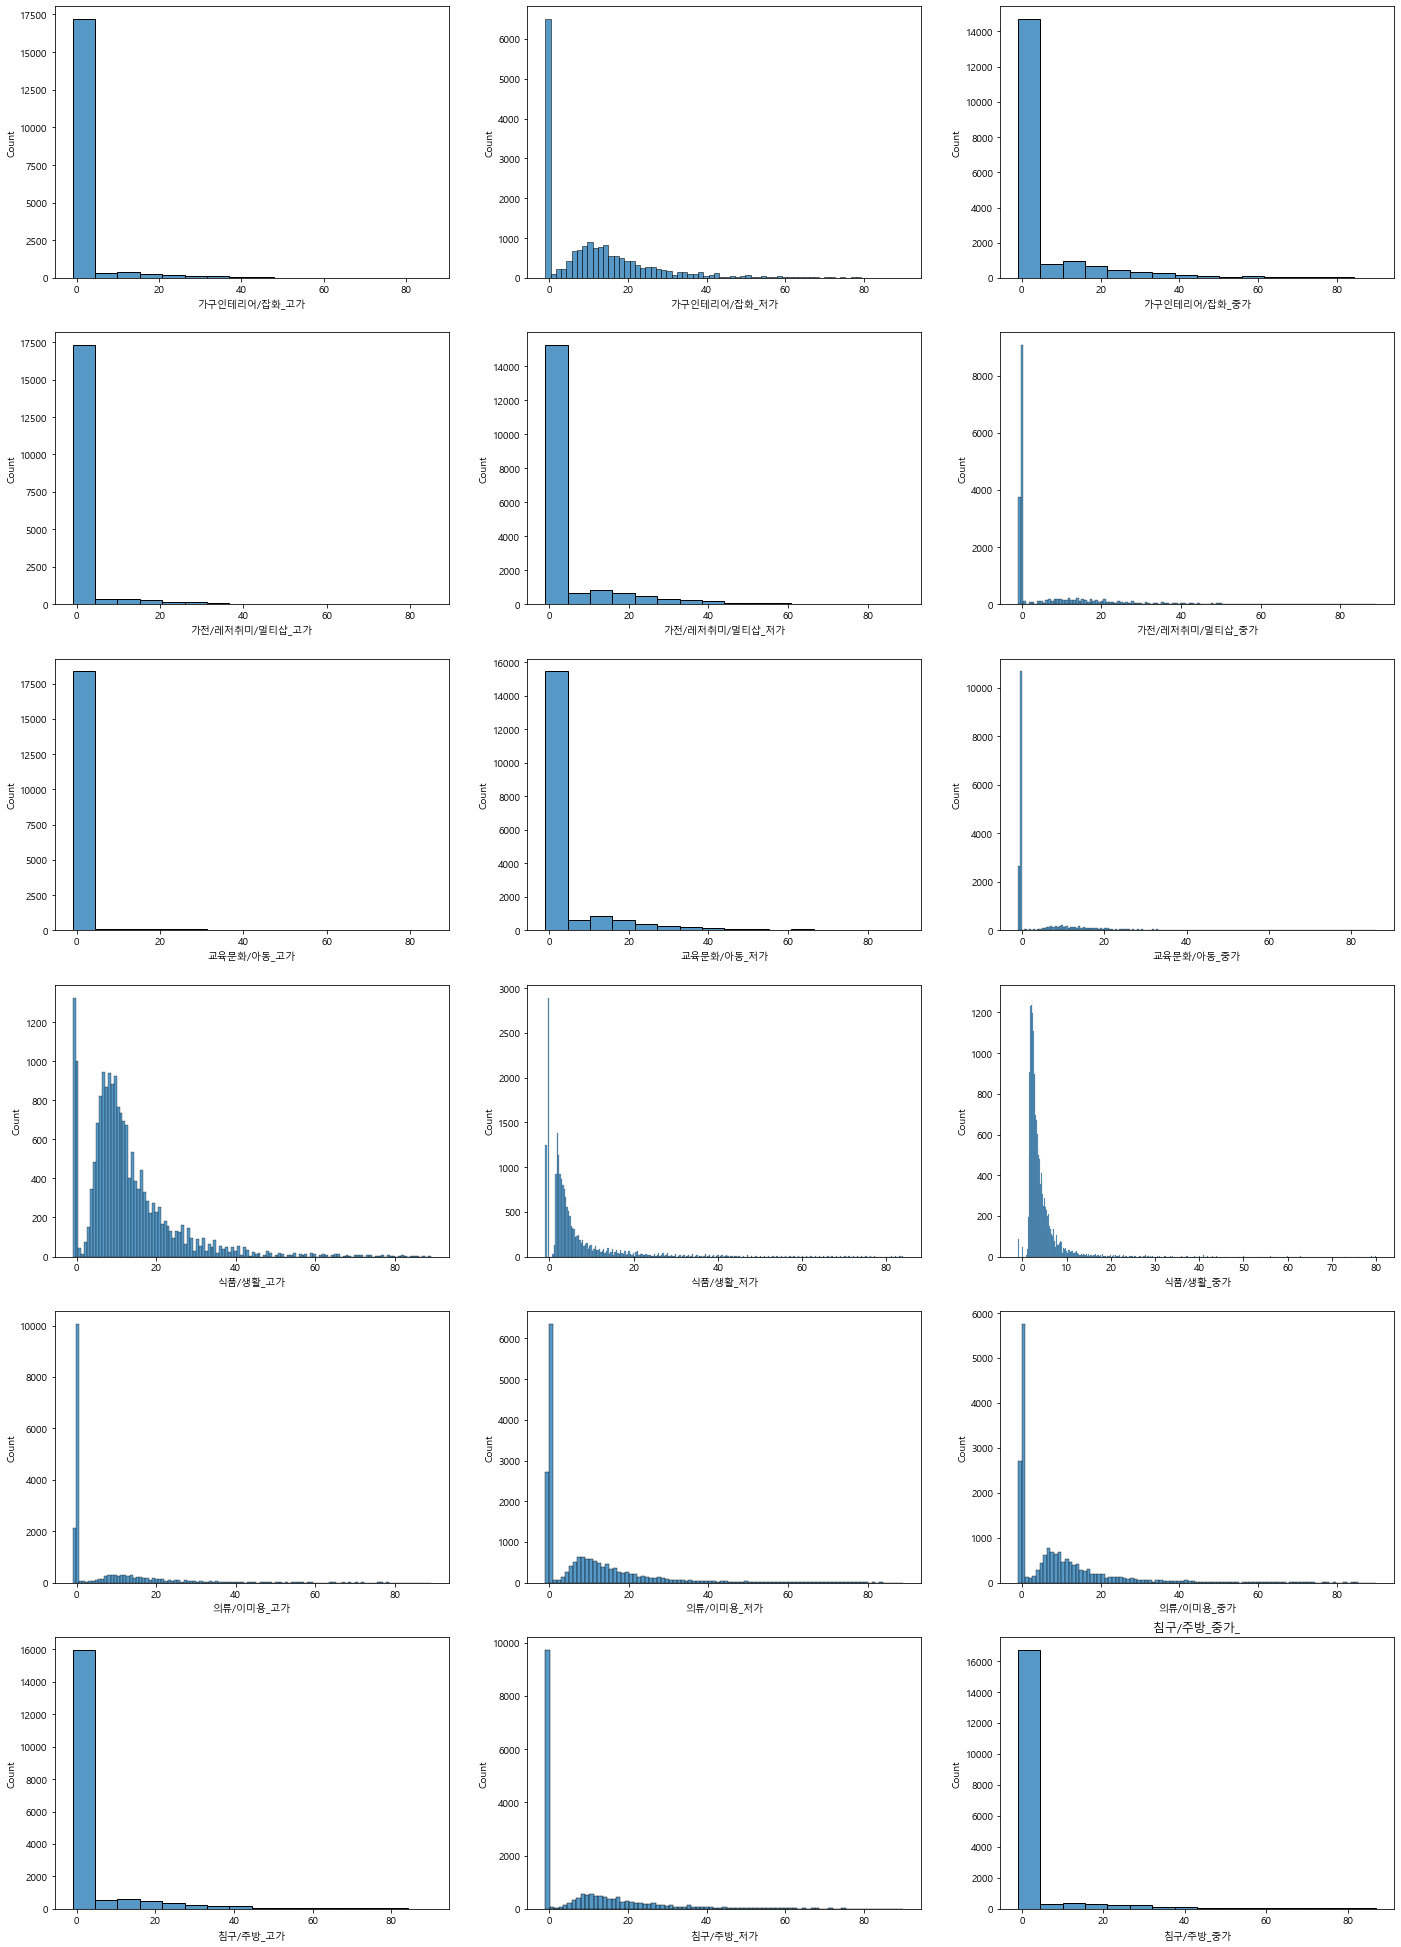

In [121]:
hist_features(Q_2)

In [122]:
# 총 평균추가
R_total_Q2 = out_q_total_df(q2, Q_2)
R_total_Q2.head()

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가,총 평균 구매주기
1,NaN,13.0,12.6,12.2,NaN,NaN,NaN,NaN,-1,5.571429,1.0,4.285714,12.857143,NaN,7.4,NaN,NaN,NaN,2.903226
2,NaN,7.8,57.0,14.0,NaN,47.0,NaN,NaN,29.0,7.166667,NaN,3.071429,4.0,NaN,6.5,22.5,NaN,40.0,2.097561
3,NaN,3.178571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,1.607143,3.73913,NaN,NaN,-1,NaN,NaN,NaN,1.551724
4,NaN,24.333333,52.0,-1,-1,-1,NaN,NaN,NaN,16.4,6.363636,2.472222,13.25,-1,9.2,NaN,-1,NaN,2.342105
6,-1,15.25,22.0,NaN,-1,NaN,NaN,NaN,NaN,11.0,3.103448,2.368421,25.666667,7.857143,7.6,31.0,17.5,NaN,1.730769


2.000000     259
3.000000     188
1.836735     131
1.525424     128
1.730769     127
            ... 
3.388889       1
6.555556       1
3.812500       1
63.000000      1
2.212121       1
Name: 총 평균 구매주기, Length: 1062, dtype: int64


<AxesSubplot:xlabel='총 평균 구매주기', ylabel='Count'>

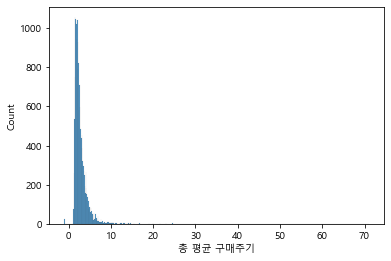

In [123]:
print(R_total_Q2['총 평균 구매주기'].value_counts())
sns.histplot(R_total_Q2['총 평균 구매주기'])

#### 3분기

In [124]:
Q_3 = out_q_df(q3)

In [125]:
Q_3.head()

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
1,-1,25.333333,26.0,NaN,NaN,-1,NaN,NaN,NaN,19.0,10.0,3.652174,10.625,NaN,7.5,1.5,NaN,2.75
2,NaN,9.625,NaN,10.75,NaN,NaN,NaN,NaN,-1,16.666667,NaN,3.115385,7.636364,NaN,12.142857,41.0,NaN,27.0
3,NaN,3.423077,NaN,NaN,-1,NaN,NaN,NaN,NaN,47.0,1.4,2.903226,NaN,NaN,NaN,NaN,25.0,NaN
4,NaN,17.666667,NaN,45.0,NaN,-1,NaN,NaN,NaN,-1,9.0,4.789474,22.5,16.0,15.6,-1,NaN,32.0
6,-1,33.0,-1,NaN,NaN,NaN,NaN,NaN,NaN,7.9,3.0,2.297297,9.111111,11.6,11.125,NaN,7.875,NaN


 0.000000     15039
-1.000000      2124
 1.000000        71
 2.000000        56
 7.000000        56
              ...  
 2.333333         1
 15.200000        1
 11.857143        1
 7.888889         1
 15.250000        1
Name: 가구인테리어/잡화_고가, Length: 287, dtype: int64
-1.000000     3397
 0.000000     3062
 14.000000     214
 11.000000     193
 21.000000     188
              ... 
 4.937500        1
 2.740741        1
 5.214286        1
 3.440000        1
 2.958333        1
Name: 가구인테리어/잡화_저가, Length: 660, dtype: int64
 0.000000     11131
-1.000000      3699
 1.000000       114
 21.000000       79
 7.000000        78
              ...  
 5.166667         1
 7.090909         1
 9.285714         1
 6.875000         1
 5.933333         1
Name: 가구인테리어/잡화_중가, Length: 358, dtype: int64
 0.000000     16145
-1.000000      1381
 1.000000        54
 3.000000        38
 7.000000        32
              ...  
 8.125000         1
 7.416667         1
 11.571429        1
 5.769231         1
 26.500000   

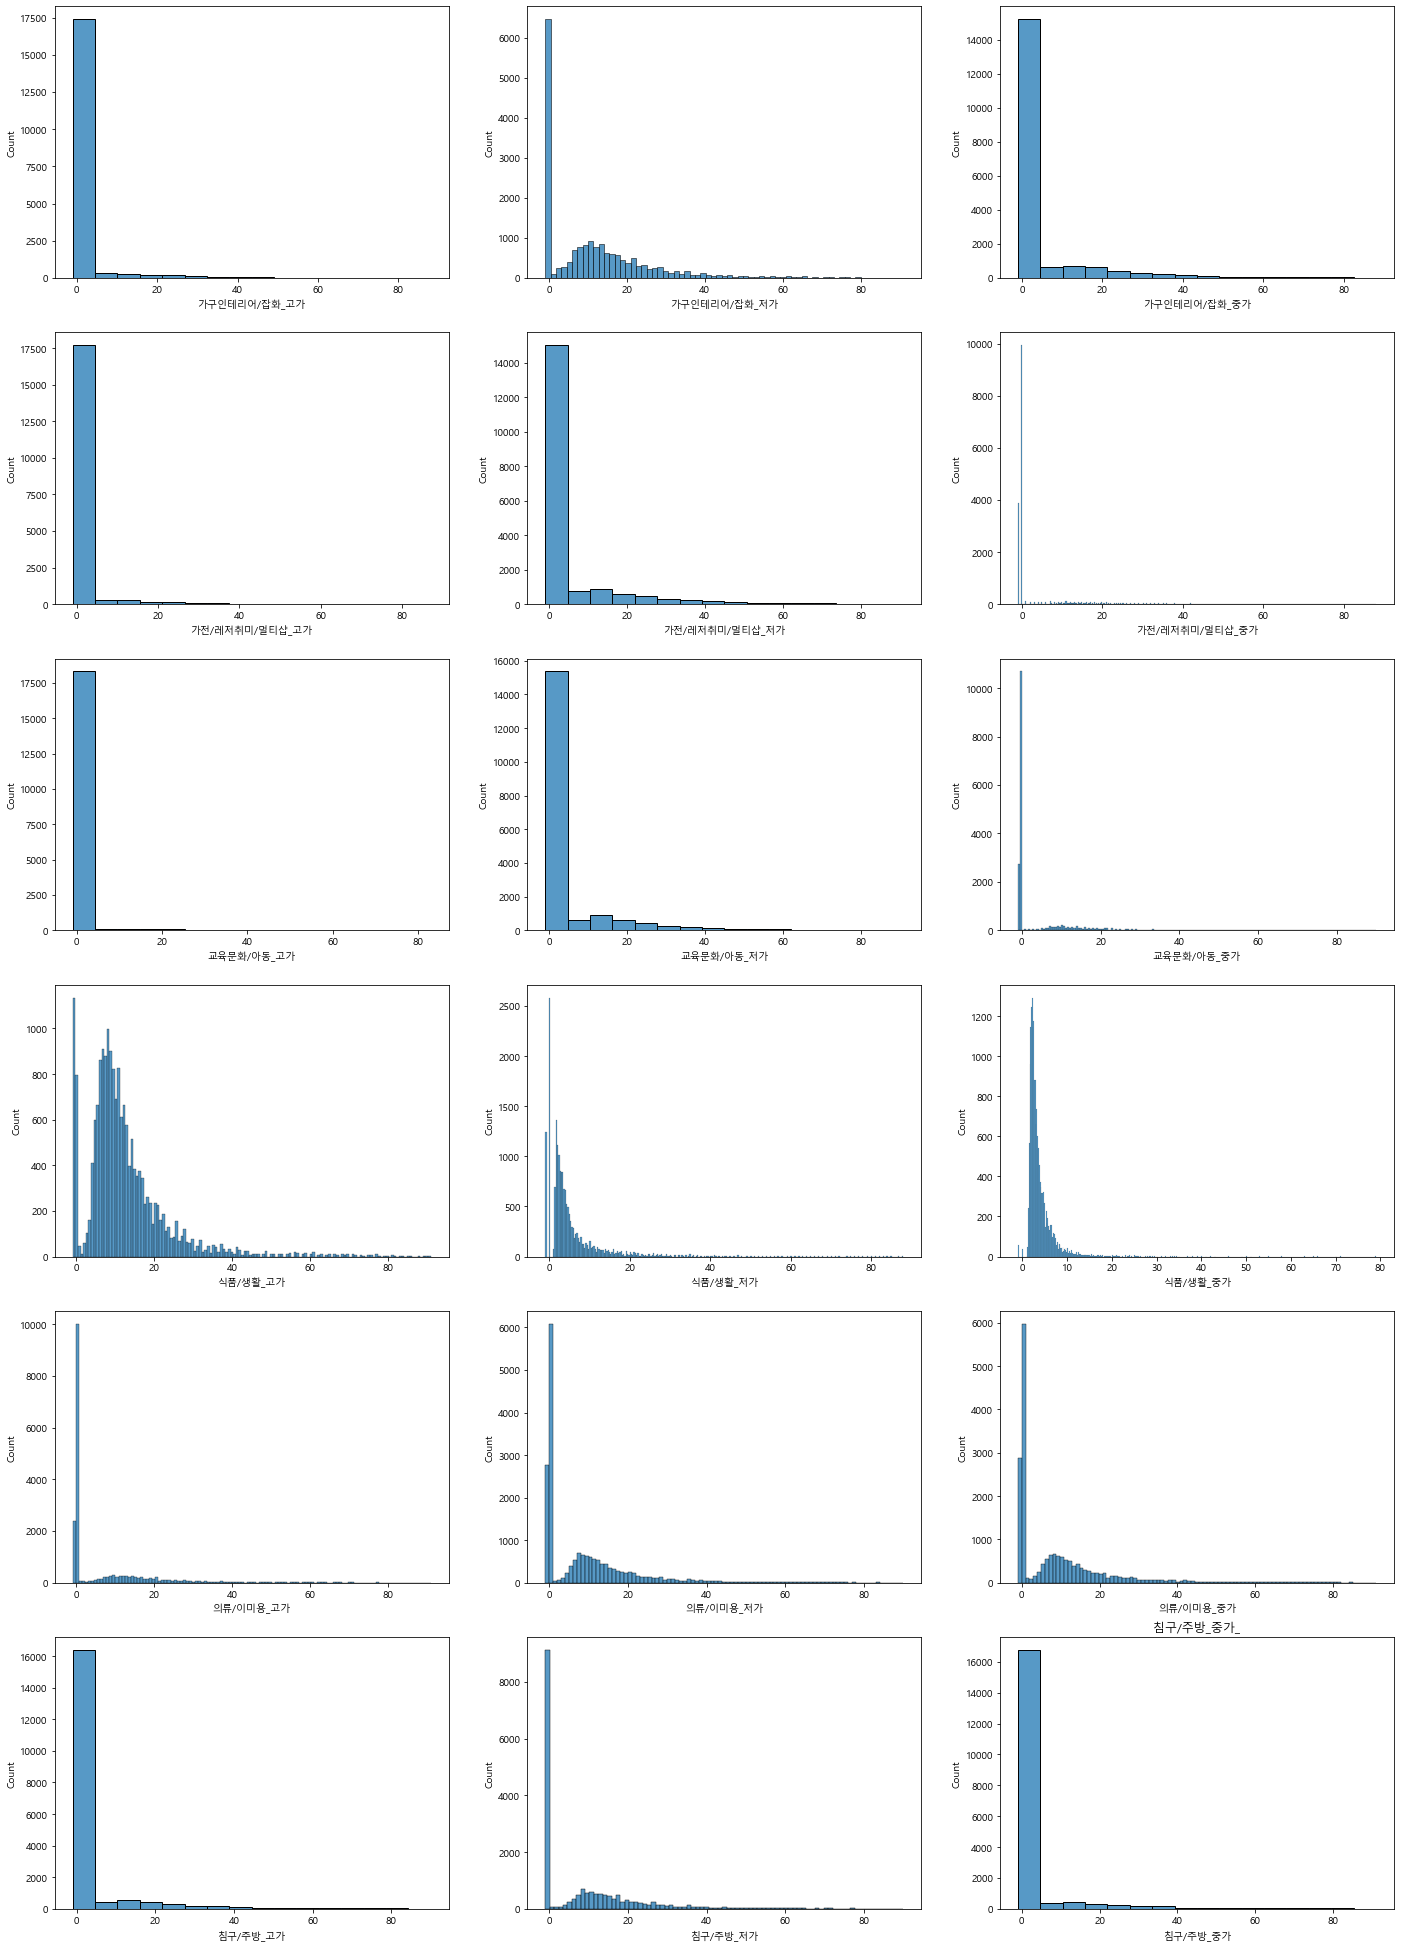

In [126]:
hist_features(Q_3)

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가,총 평균 구매주기
1,-1,25.333333,26.0,NaN,NaN,-1,NaN,NaN,NaN,19.0,10.0,3.652174,10.625,NaN,7.5,1.5,NaN,2.75,2.500000
2,NaN,9.625,NaN,10.75,NaN,NaN,NaN,NaN,-1,16.666667,NaN,3.115385,7.636364,NaN,12.142857,41.0,NaN,27.0,2.146341
3,NaN,3.423077,NaN,NaN,-1,NaN,NaN,NaN,NaN,47.0,1.4,2.903226,NaN,NaN,NaN,NaN,25.0,NaN,1.338235
4,NaN,17.666667,NaN,45.0,NaN,-1,NaN,NaN,NaN,-1,9.0,4.789474,22.5,16.0,15.6,-1,NaN,32.0,3.791667
6,-1,33.0,-1,NaN,NaN,NaN,NaN,NaN,NaN,7.9,3.0,2.297297,9.111111,11.6,11.125,NaN,7.875,NaN,1.648148


2.000000    177
2.500000    142
1.685185    142
1.654545    140
3.000000    136
           ... 
2.840000      1
2.538462      1
4.083333      1
5.769231      1
2.520000      1
Name: 총 평균 구매주기, Length: 1061, dtype: int64


<AxesSubplot:xlabel='총 평균 구매주기', ylabel='Count'>

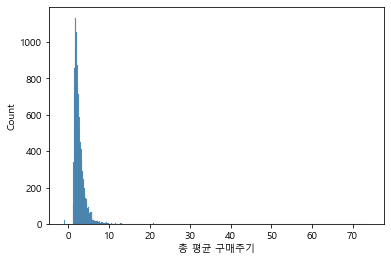

In [127]:
# 총 평균추가
R_total_Q3 = out_q_total_df(q3, Q_3)
display(R_total_Q3.head())

print(R_total_Q3['총 평균 구매주기'].value_counts())
sns.histplot(R_total_Q3['총 평균 구매주기'])

#### 4분기

In [128]:
Q_4 = out_q_df(q4)

In [129]:
Q_4.head()

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
1,NaN,2.5,35.5,29.0,NaN,-1,NaN,NaN,NaN,9.111111,17.5,3.5,18.333333,-1,7.583333,12.0,-1,24.0
2,-1,9.777778,NaN,37.0,-1,NaN,NaN,NaN,NaN,15.0,-1,3.461538,10.8,NaN,9.0,-1,NaN,4.0
3,NaN,4.944444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.5,1.636364,4.090909,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,17.0,NaN,NaN,NaN,-1,NaN,NaN,NaN,-1,10.5,4.047619,26.0,-1,14.5,2.0,-1,32.0
6,NaN,11.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.333333,3.333333,2.170732,10.428571,7.285714,14.8,-1,4.8,-1


 0.000000     14782
-1.000000      1989
 1.000000        59
 2.000000        58
 7.000000        55
              ...  
 7.555556         1
 13.200000        1
 3.863636         1
 4.888889         1
 14.800000        1
Name: 가구인테리어/잡화_고가, Length: 327, dtype: int64
 0.000000     3234
-1.000000     3196
 14.000000     247
 15.000000     203
 11.000000     201
              ... 
 5.111111        1
 3.320000        1
 2.382353        1
 2.612903        1
 3.933333        1
Name: 가구인테리어/잡화_저가, Length: 666, dtype: int64
 0.000000     11091
-1.000000      3713
 1.000000       112
 7.000000       111
 14.000000       78
              ...  
 6.538462         1
 6.142857         1
 6.714286         1
 8.555556         1
 10.375000        1
Name: 가구인테리어/잡화_중가, Length: 352, dtype: int64
 0.000000     15984
-1.000000      1305
 7.000000        46
 2.000000        42
 8.000000        41
              ...  
 10.200000        1
 20.750000        1
 22.750000        1
 3.700000         1
 9.888889    

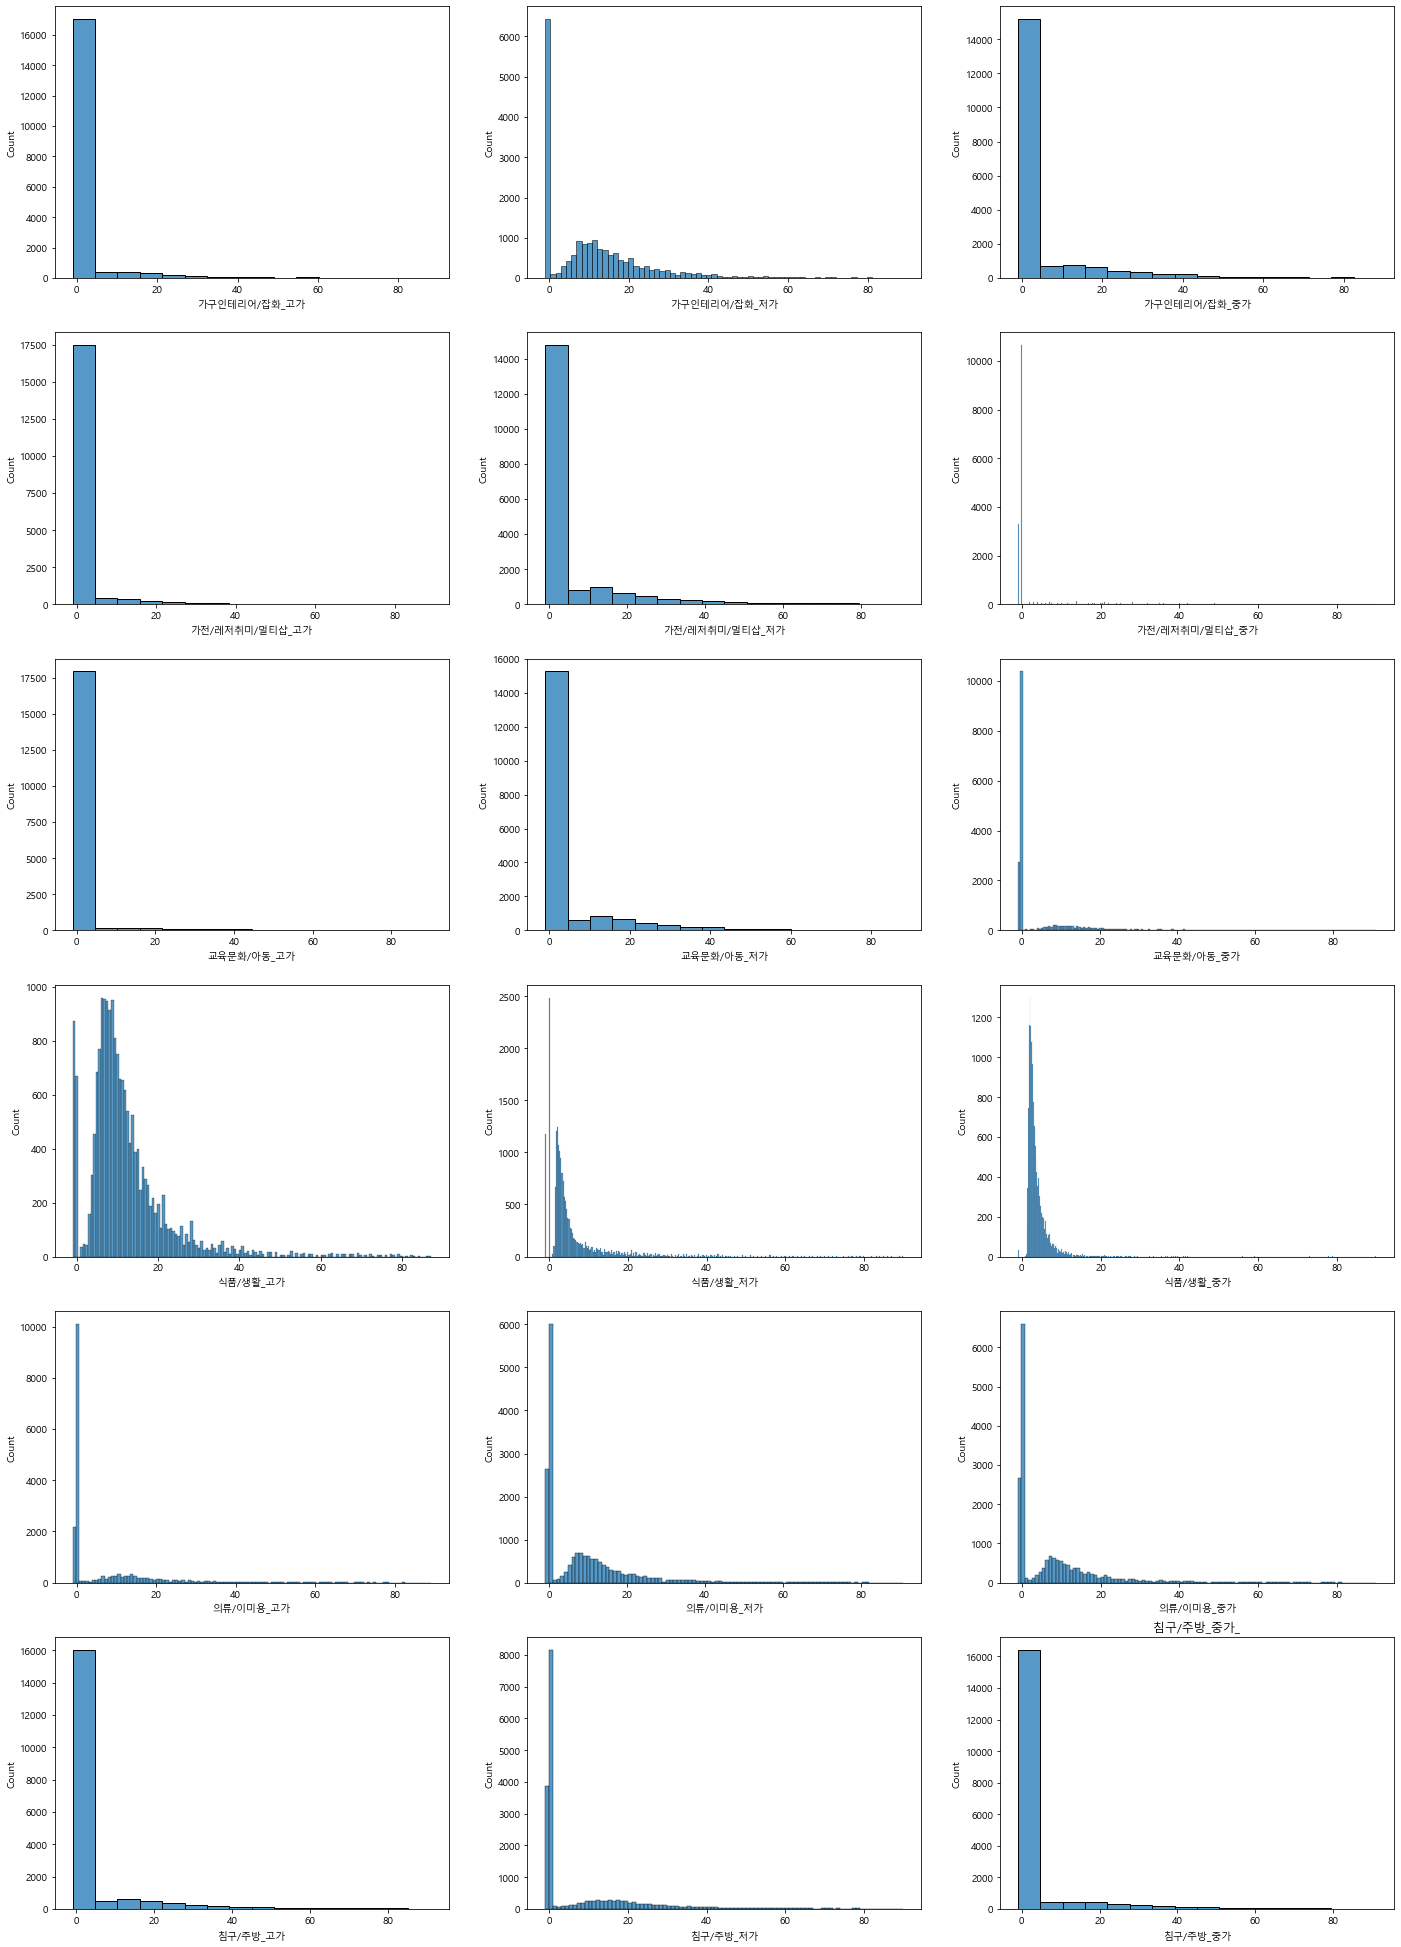

In [130]:
hist_features(Q_4)

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가,총 평균 구매주기
1,NaN,2.5,35.5,29.0,NaN,-1,NaN,NaN,NaN,9.111111,17.5,3.5,18.333333,-1,7.583333,12.0,-1,24.0,2.676471
2,-1,9.777778,NaN,37.0,-1,NaN,NaN,NaN,NaN,15.0,-1,3.461538,10.8,NaN,9.0,-1,NaN,4.0,2.812500
3,NaN,4.944444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.5,1.636364,4.090909,NaN,NaN,NaN,NaN,NaN,NaN,1.578947
4,NaN,17.0,NaN,NaN,NaN,-1,NaN,NaN,NaN,-1,10.5,4.047619,26.0,-1,14.5,2.0,-1,32.0,3.863636
6,NaN,11.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.333333,3.333333,2.170732,10.428571,7.285714,14.8,-1,4.8,-1,1.698113


2.000000     204
1.750000     163
1.654545     155
1.820000     151
1.542373     146
            ... 
14.833333      1
4.562500       1
9.777778       1
3.421053       1
15.600000      1
Name: 총 평균 구매주기, Length: 1018, dtype: int64


<AxesSubplot:xlabel='총 평균 구매주기', ylabel='Count'>

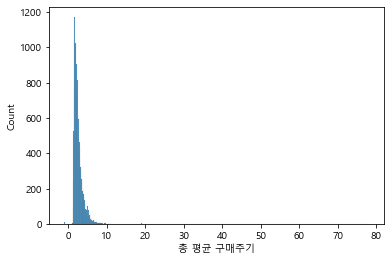

In [131]:
# 총 평균추가
R_total_Q4 = out_q_total_df(q4, Q_4)
display(R_total_Q4.head())

print(R_total_Q4['총 평균 구매주기'].value_counts())
sns.histplot(R_total_Q4['총 평균 구매주기'])

#### 5분기

In [132]:
Q_5 = out_q_df(q5)

In [133]:
Q_5.head()

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
1,-1,19.25,21.5,-1,NaN,35.0,NaN,NaN,NaN,8.25,20.666667,3.478261,19.5,NaN,9.857143,27.5,-1,19.5
2,10.0,7.625,19.0,25.333333,30.0,NaN,NaN,NaN,23.5,5.785714,NaN,3.24,5.142857,NaN,47.0,17.75,NaN,NaN
3,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,3.230769,8.3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,24.0,NaN,NaN,NaN,-1,NaN,NaN,NaN,23.333333,14.8,2.806452,-1,-1,21.75,-1,NaN,NaN
6,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.714286,2.472222,1.618182,20.0,18.666667,39.0,40.5,15.5,19.0


 0.000000     15079
-1.000000      1989
 7.000000        60
 1.000000        57
 14.000000       54
              ...  
 4.800000         1
 9.714286         1
 3.600000         1
 6.461538         1
 17.333333        1
Name: 가구인테리어/잡화_고가, Length: 295, dtype: int64
 0.000000     3699
-1.000000     3688
 14.000000     229
 13.000000     174
 10.000000     167
              ... 
 2.800000        1
 4.150000        1
 4.285714        1
 4.076923        1
 3.423077        1
Name: 가구인테리어/잡화_저가, Length: 587, dtype: int64
 0.000000     11681
-1.000000      3697
 1.000000        91
 7.000000        89
 14.000000       86
              ...  
 6.727273         1
 5.857143         1
 9.875000         1
 7.166667         1
 12.833333        1
Name: 가구인테리어/잡화_중가, Length: 336, dtype: int64
 0.000000     16301
-1.000000      1344
 1.000000        57
 2.000000        41
 4.000000        41
              ...  
 6.600000         1
 11.750000        1
 12.200000        1
 7.636364         1
 34.500000   

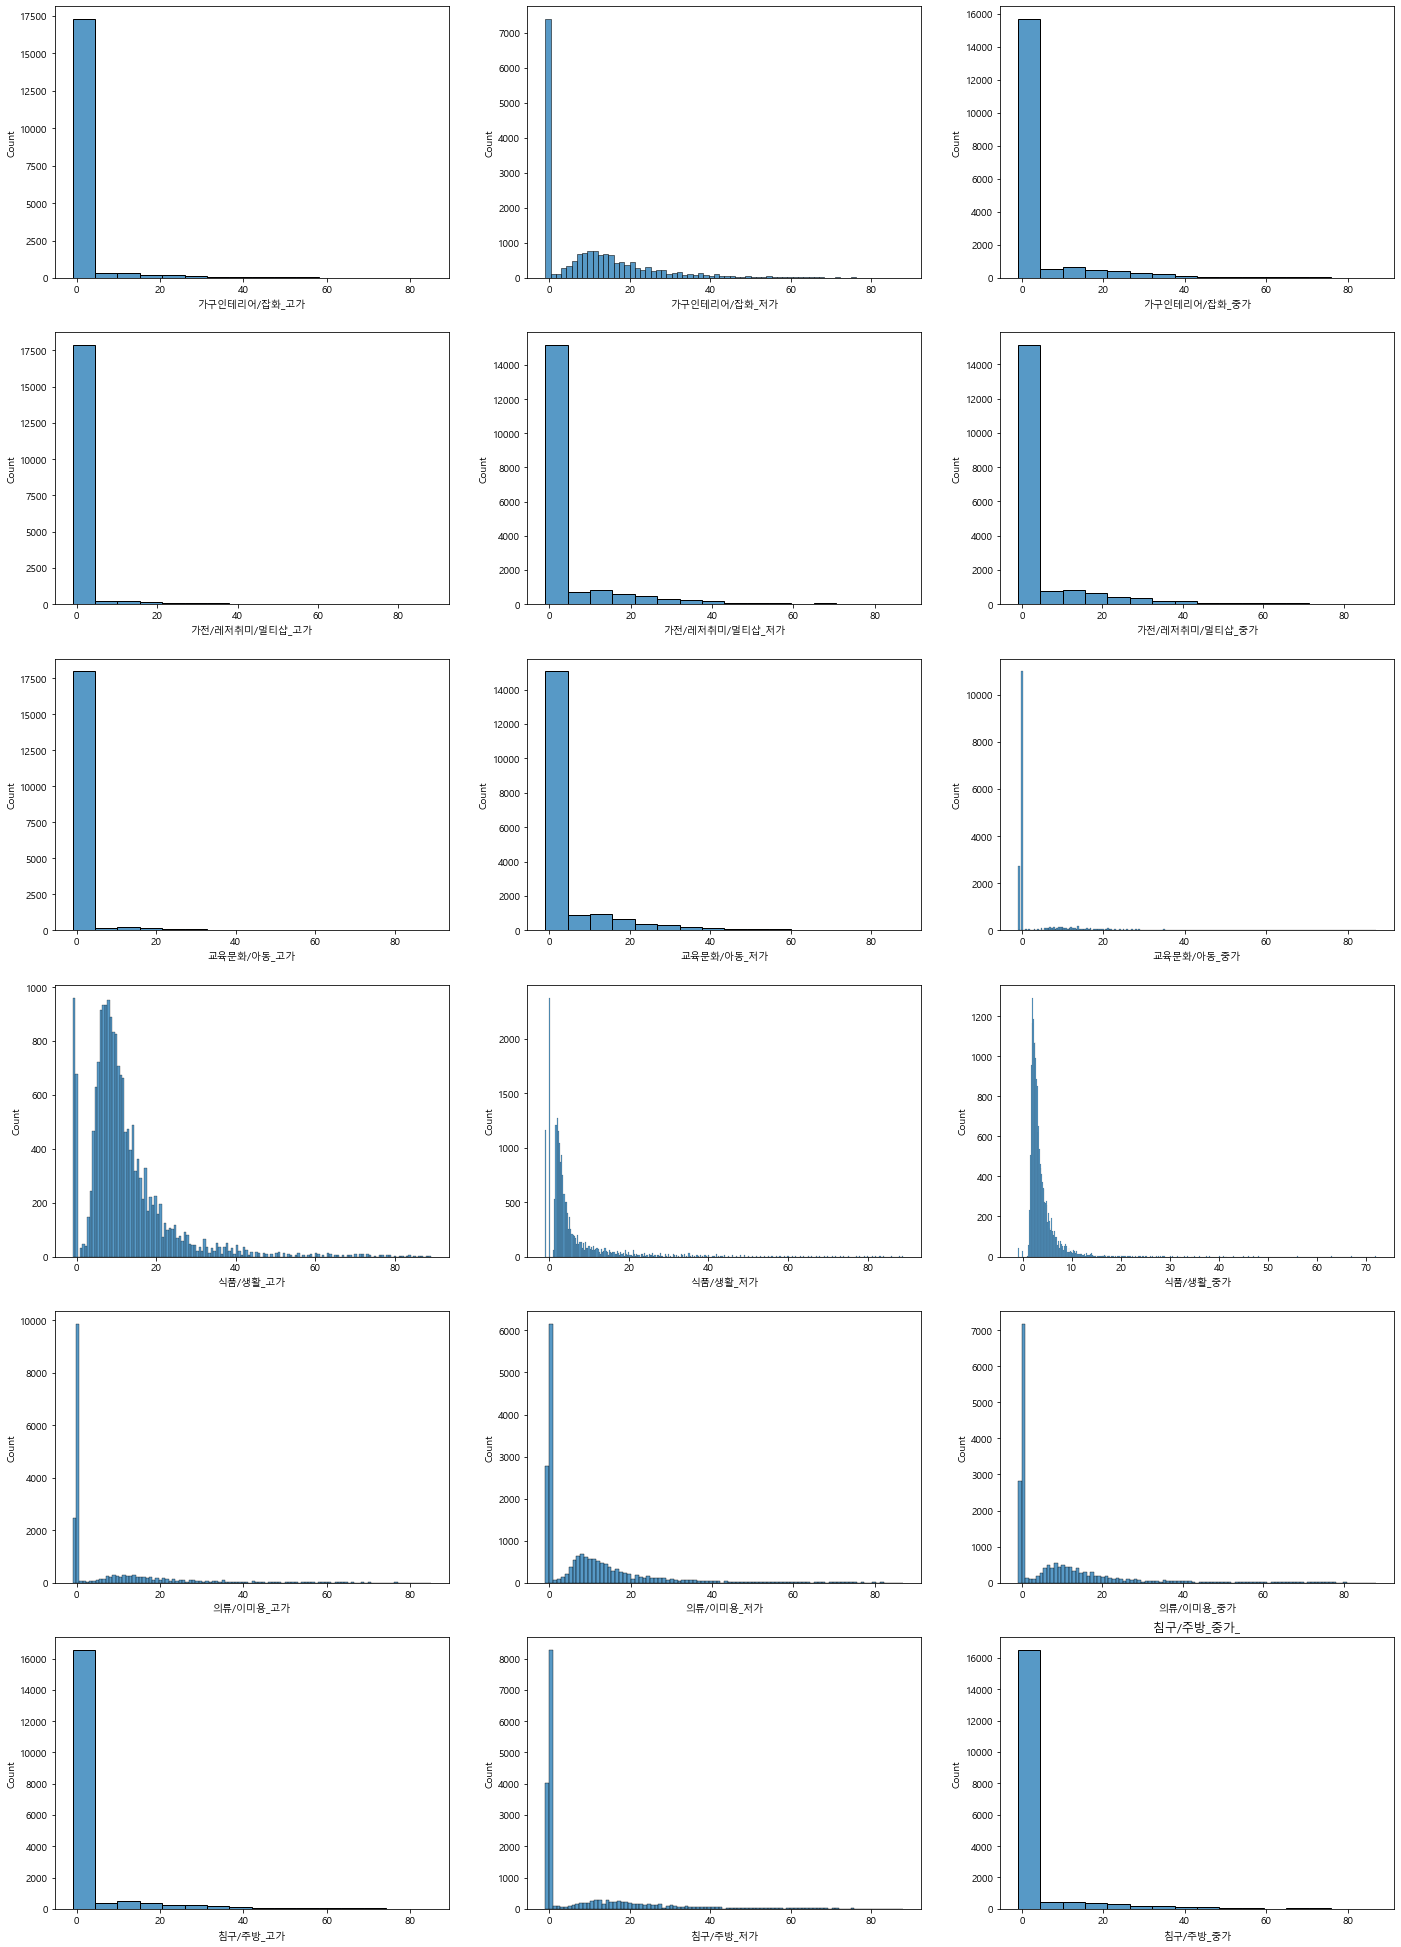

In [134]:
hist_features(Q_5)

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가,총 평균 구매주기
1,-1,19.25,21.5,-1,NaN,35.0,NaN,NaN,NaN,8.25,20.666667,3.478261,19.5,NaN,9.857143,27.5,-1,19.5,3.071429
2,10.0,7.625,19.0,25.333333,30.0,NaN,NaN,NaN,23.5,5.785714,NaN,3.24,5.142857,NaN,47.0,17.75,NaN,NaN,2.100000
3,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,3.230769,8.3,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
4,NaN,24.0,NaN,NaN,NaN,-1,NaN,NaN,NaN,23.333333,14.8,2.806452,-1,-1,21.75,-1,NaN,NaN,2.485714
6,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.714286,2.472222,1.618182,20.0,18.666667,39.0,40.5,15.5,19.0,1.435484


2.000000    215
3.000000    146
1.913043    145
1.795918    131
1.725490    127
           ... 
3.380952      1
1.531915      1
3.368421      1
2.620690      1
5.538462      1
Name: 총 평균 구매주기, Length: 1014, dtype: int64


<AxesSubplot:xlabel='총 평균 구매주기', ylabel='Count'>

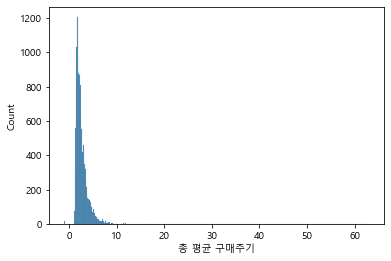

In [135]:
# 총 평균추가
R_total_Q5 = out_q_total_df(q5, Q_5)
display(R_total_Q5.head())

print(R_total_Q5['총 평균 구매주기'].value_counts())
sns.histplot(R_total_Q5['총 평균 구매주기'])

#### 6분기

In [136]:
Q_6 = out_q_df(q6)

In [137]:
Q_6.head()

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
1,-1,10.0,-1,NaN,NaN,-1,NaN,NaN,NaN,13.166667,17.25,4.142857,18.0,NaN,9.444444,62.0,NaN,NaN
2,NaN,10.0,NaN,-1,NaN,NaN,NaN,NaN,NaN,13.25,-1,5.6,13.6,7.5,16.5,-1,NaN,21.0
3,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.046512,5.125,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,12.0,-1,NaN,NaN,-1,NaN,-1,NaN,12.0,9.222222,2.870968,50.0,-1,13.0,NaN,NaN,NaN
6,-1,21.666667,-1,NaN,NaN,NaN,NaN,NaN,NaN,15.666667,3.913043,2.093023,10.857143,12.75,7.5,NaN,NaN,NaN


 0.000000     14584
-1.000000      2077
 1.000000        74
 2.000000        66
 7.000000        61
              ...  
 14.166667        1
 24.666667        1
 10.625000        1
 4.250000         1
 7.800000         1
Name: 가구인테리어/잡화_고가, Length: 320, dtype: int64
 0.000000     3637
-1.000000     3491
 14.000000     219
 12.000000     196
 21.000000     183
              ... 
 4.111111        1
 3.400000        1
 3.833333        1
 3.192308        1
 2.866667        1
Name: 가구인테리어/잡화_저가, Length: 631, dtype: int64
 0.000000     10652
-1.000000      3623
 14.000000      103
 7.000000       100
 1.000000        92
              ...  
 9.857143         1
 6.714286         1
 7.363636         1
 4.200000         1
 3.437500         1
Name: 가구인테리어/잡화_중가, Length: 385, dtype: int64
 0.000000     15602
-1.000000      1472
 1.000000        70
 7.000000        44
 14.000000       41
              ...  
 8.428571         1
 5.285714         1
 6.428571         1
 6.916667         1
 7.166667    

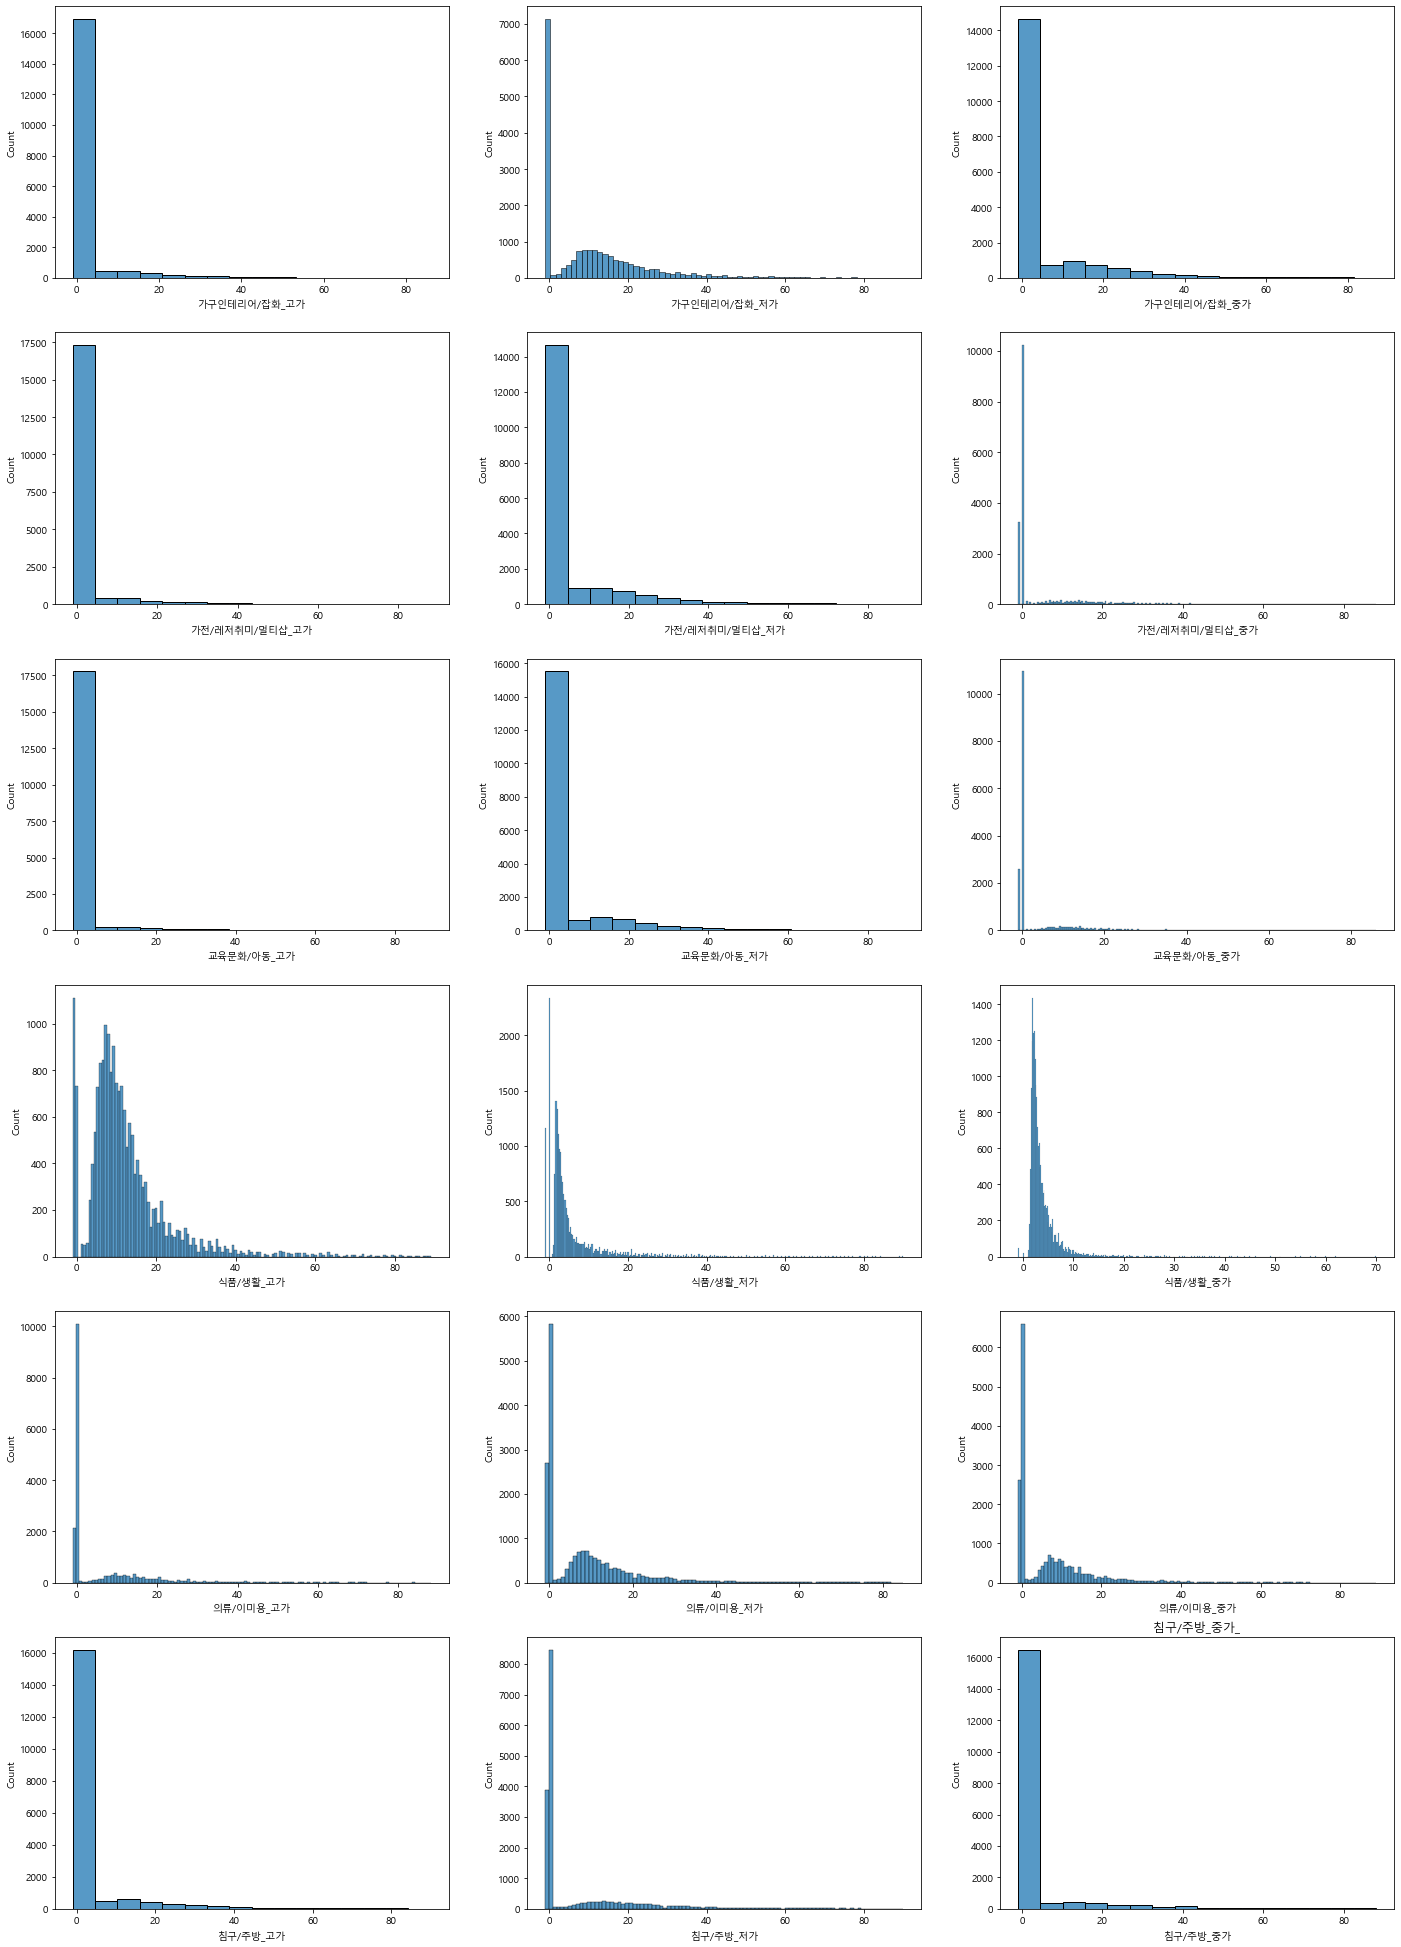

In [138]:
hist_features(Q_6)

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가,총 평균 구매주기
1,-1,10.0,-1,NaN,NaN,-1,NaN,NaN,NaN,13.166667,17.25,4.142857,18.0,NaN,9.444444,62.0,NaN,NaN,3.480000
2,NaN,10.0,NaN,-1,NaN,NaN,NaN,NaN,NaN,13.25,-1,5.6,13.6,7.5,16.5,-1,NaN,21.0,3.652174
3,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.046512,5.125,NaN,NaN,NaN,NaN,NaN,NaN,1.955556
4,NaN,12.0,-1,NaN,NaN,-1,NaN,-1,NaN,12.0,9.222222,2.870968,50.0,-1,13.0,NaN,NaN,NaN,2.617647
6,-1,21.666667,-1,NaN,NaN,NaN,NaN,NaN,NaN,15.666667,3.913043,2.093023,10.857143,12.75,7.5,NaN,NaN,NaN,1.800000


2.000000    233
1.698113    153
1.500000    149
1.666667    146
1.607143    145
           ... 
1.178082      1
1.098765      1
8.714286      1
1.619048      1
1.925000      1
Name: 총 평균 구매주기, Length: 1033, dtype: int64


<AxesSubplot:xlabel='총 평균 구매주기', ylabel='Count'>

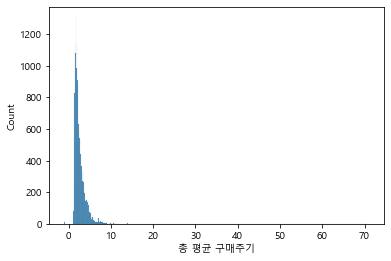

In [139]:
# 총 평균추가
R_total_Q6 = out_q_total_df(q6, Q_6)
display(R_total_Q6.head())

print(R_total_Q6['총 평균 구매주기'].value_counts())
sns.histplot(R_total_Q6['총 평균 구매주기'])

#### 7분기

In [140]:
Q_7 = out_q_df(q7)

In [141]:
Q_7.head()

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
1,NaN,NaN,22.333333,-1,NaN,-1,NaN,NaN,NaN,18.666667,-1,5.833333,-1,NaN,7.454545,34.0,NaN,NaN
2,NaN,8.428571,NaN,7.0,NaN,NaN,NaN,NaN,54.0,12.714286,-1,5.235294,12.0,-1,10.857143,27.333333,NaN,-1
3,NaN,6.0,NaN,NaN,-1,NaN,NaN,NaN,NaN,17.0,2.131579,3.478261,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,16.8,-1,NaN,-1,63.0,NaN,NaN,NaN,19.25,11.8,2.870968,-1,27.333333,11.125,-1,NaN,NaN
6,-1,24.5,67.0,NaN,NaN,NaN,NaN,-1,NaN,8.666667,2.7,1.666667,15.6,12.333333,8.125,NaN,61.0,-1


 0.000000     14881
-1.000000      2033
 1.000000        62
 3.000000        50
 4.000000        46
              ...  
 14.250000        1
 4.333333         1
 84.000000        1
 8.444444         1
 8.166667         1
Name: 가구인테리어/잡화_고가, Length: 319, dtype: int64
 0.000000     3916
-1.000000     3666
 14.000000     193
 13.000000     185
 10.000000     183
              ... 
 6.625000        1
 1.934783        1
 45.500000       1
 91.000000       1
 3.142857        1
Name: 가구인테리어/잡화_저가, Length: 637, dtype: int64
 0.000000     11362
-1.000000      3695
 7.000000        97
 1.000000        85
 2.000000        84
              ...  
 16.400000        1
 7.142857         1
 13.200000        1
 6.250000         1
 4.555556         1
Name: 가구인테리어/잡화_중가, Length: 347, dtype: int64
 0.000000     16102
-1.000000      1350
 1.000000        48
 3.000000        41
 2.000000        33
              ...  
 10.250000        1
 24.666667        1
 22.333333        1
 27.333333        1
 4.333333    

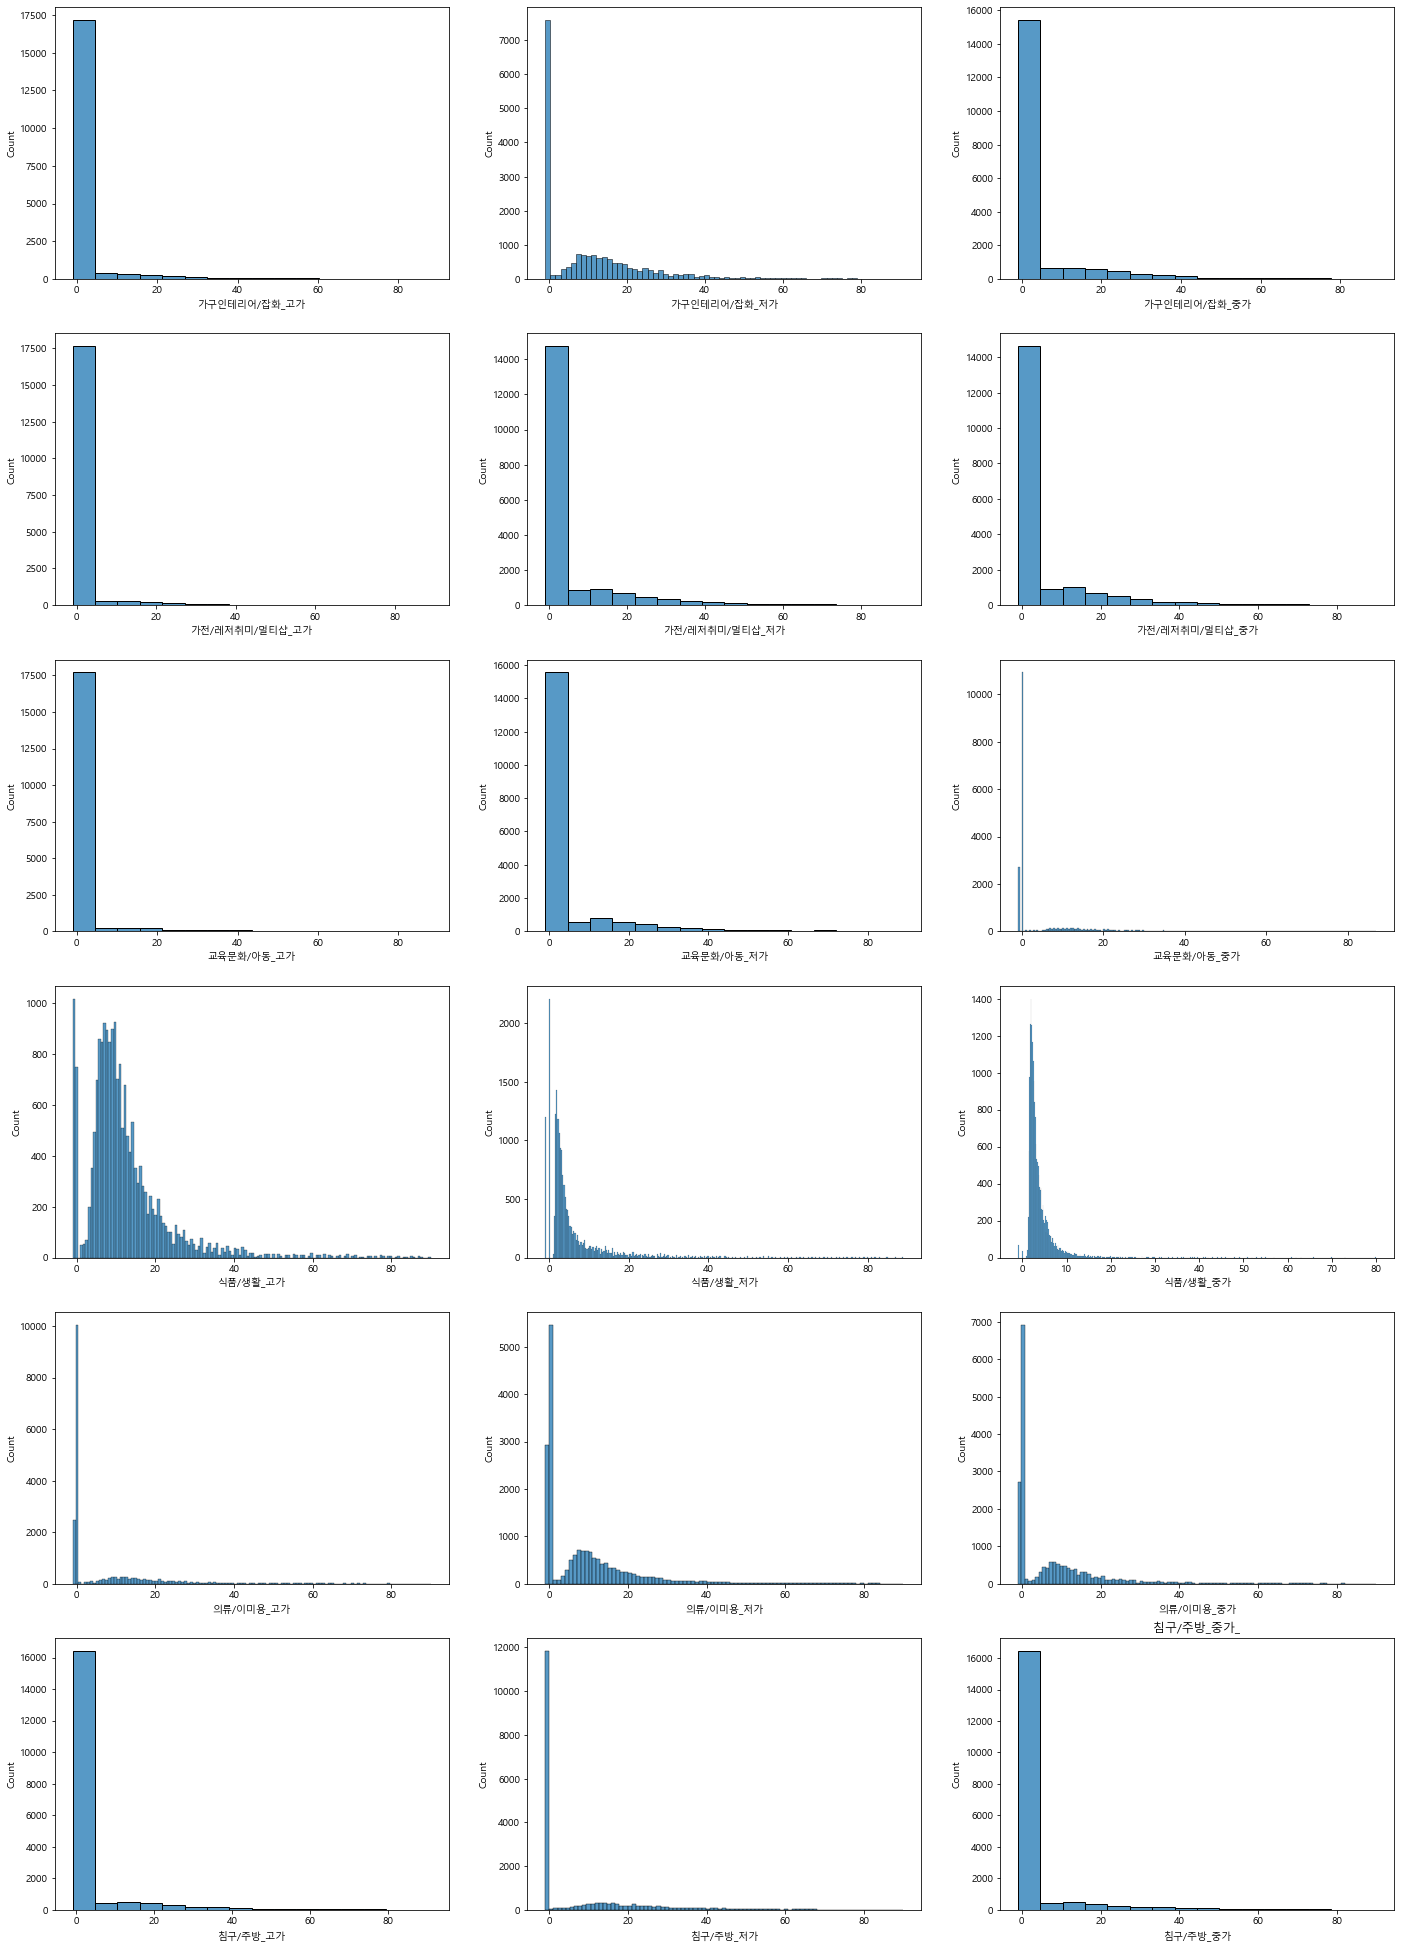

In [142]:
hist_features(Q_7)

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가,총 평균 구매주기
1,NaN,NaN,22.333333,-1,NaN,-1,NaN,NaN,NaN,18.666667,-1,5.833333,-1,NaN,7.454545,34.0,NaN,NaN,3.416667
2,NaN,8.428571,NaN,7.0,NaN,NaN,NaN,NaN,54.0,12.714286,-1,5.235294,12.0,-1,10.857143,27.333333,NaN,-1,2.696970
3,NaN,6.0,NaN,NaN,-1,NaN,NaN,NaN,NaN,17.0,2.131579,3.478261,NaN,NaN,NaN,NaN,NaN,NaN,1.840909
4,NaN,16.8,-1,NaN,-1,63.0,NaN,NaN,NaN,19.25,11.8,2.870968,-1,27.333333,11.125,-1,NaN,NaN,2.542857
6,-1,24.5,67.0,NaN,NaN,NaN,NaN,-1,NaN,8.666667,2.7,1.666667,15.6,12.333333,8.125,NaN,61.0,-1,1.444444


2.000000    186
1.596491    164
1.685185    160
1.716981    155
1.625000    148
           ... 
9.111111      1
8.166667      1
4.466667      1
3.812500      1
1.620000      1
Name: 총 평균 구매주기, Length: 1117, dtype: int64


<AxesSubplot:xlabel='총 평균 구매주기', ylabel='Count'>

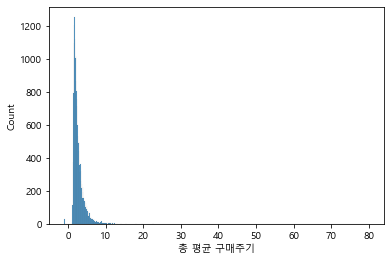

In [143]:
# 총 평균추가
R_total_Q7 = out_q_total_df(q7, Q_7)
display(R_total_Q7.head())

print(R_total_Q7['총 평균 구매주기'].value_counts())
sns.histplot(R_total_Q7['총 평균 구매주기'])

#### 8분기

In [144]:
Q_8 = out_q_df(q8)

In [145]:
Q_8.head()

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
1,NaN,38.5,-1,-1,NaN,NaN,NaN,NaN,NaN,12.0,5.0,6.357143,24.5,NaN,8.666667,8.0,NaN,-1
2,NaN,11.285714,NaN,-1,NaN,NaN,NaN,NaN,NaN,4.166667,NaN,3.869565,9.111111,NaN,13.166667,NaN,NaN,31.5
3,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.034483,4.777778,NaN,23.0,NaN,NaN,NaN,NaN
4,NaN,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,13.0,3.0,NaN,-1,11.166667,NaN,NaN,-1
6,-1,14.333333,-1,-1,1.0,NaN,NaN,-1,NaN,11.833333,3.333333,1.770833,8.4,7.444444,10.0,NaN,-1,NaN


 0.000000     14679
-1.000000      2094
 1.000000        69
 7.000000        61
 14.000000       50
              ...  
 8.777778         1
 6.916667         1
 44.500000        1
 90.000000        1
 17.600000        1
Name: 가구인테리어/잡화_고가, Length: 333, dtype: int64
 0.000000     3676
-1.000000     3510
 14.000000     204
 10.000000     182
 11.000000     172
              ... 
 6.571429        1
 5.166667        1
 5.733333        1
 3.520000        1
 3.178571        1
Name: 가구인테리어/잡화_저가, Length: 646, dtype: int64
 0.000000     11546
-1.000000      3580
 1.000000       103
 2.000000        78
 21.000000       77
              ...  
 10.375000        1
 18.750000        1
 8.833333         1
 8.142857         1
 4.473684         1
Name: 가구인테리어/잡화_중가, Length: 348, dtype: int64
 0.000000     15939
-1.000000      1366
 1.000000        44
 14.000000       43
 7.000000        36
              ...  
 3.666667         1
 10.714286        1
 8.444444         1
 20.666667        1
 3.636364    

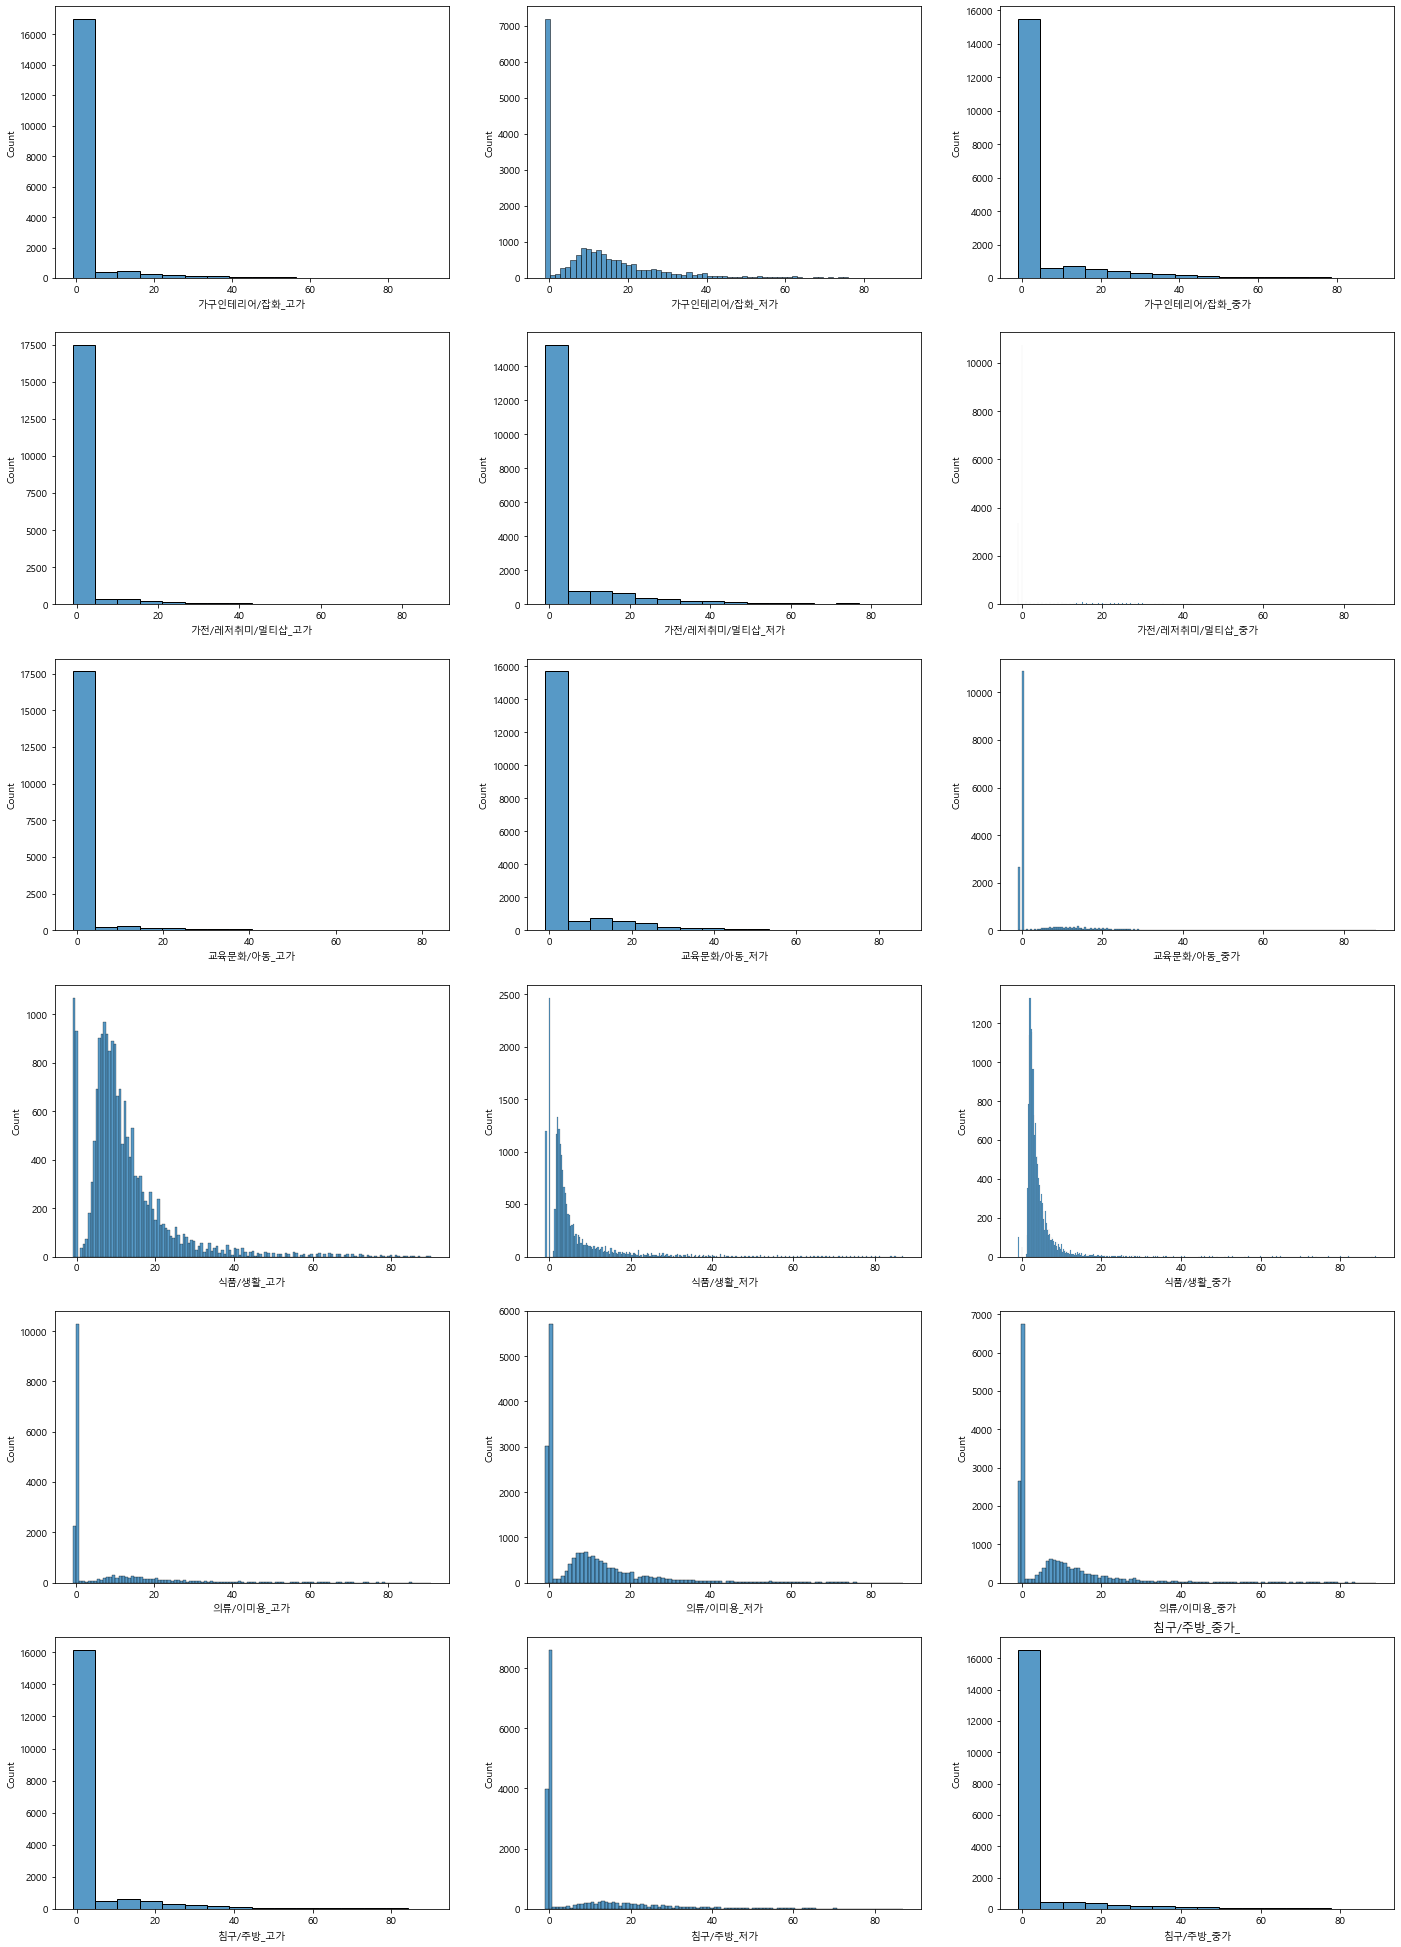

In [146]:
hist_features(Q_8)

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가,총 평균 구매주기
1,NaN,38.5,-1,-1,NaN,NaN,NaN,NaN,NaN,12.0,5.0,6.357143,24.5,NaN,8.666667,8.0,NaN,-1,4.045455
2,NaN,11.285714,NaN,-1,NaN,NaN,NaN,NaN,NaN,4.166667,NaN,3.869565,9.111111,NaN,13.166667,NaN,NaN,31.5,3.068966
3,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.034483,4.777778,NaN,23.0,NaN,NaN,NaN,NaN,2.378378
4,NaN,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,13.0,3.0,NaN,-1,11.166667,NaN,NaN,-1,2.500000
6,-1,14.333333,-1,-1,1.0,NaN,NaN,-1,NaN,11.833333,3.333333,1.770833,8.4,7.444444,10.0,NaN,-1,NaN,1.634615


2.000000     213
3.000000     176
2.500000     113
1.516667      95
1.568966      95
            ... 
1.673913       1
1.173333       1
15.750000      1
1.653061       1
12.166667      1
Name: 총 평균 구매주기, Length: 1238, dtype: int64


<AxesSubplot:xlabel='총 평균 구매주기', ylabel='Count'>

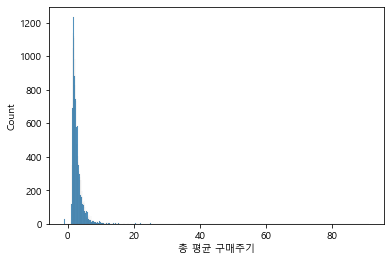

In [147]:
# 총 평균추가
R_total_Q8 = out_q_total_df(q8, Q_8)
display(R_total_Q8.head())

print(R_total_Q8['총 평균 구매주기'].value_counts())
sns.histplot(R_total_Q8['총 평균 구매주기'])

# [파일 확인]

In [148]:
R_total_Q3

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가,총 평균 구매주기
1,-1,25.333333,26.0,NaN,NaN,-1,NaN,NaN,NaN,19.0,10.0,3.652174,10.625,NaN,7.5,1.5,NaN,2.75,2.500000
2,NaN,9.625,NaN,10.75,NaN,NaN,NaN,NaN,-1,16.666667,NaN,3.115385,7.636364,NaN,12.142857,41.0,NaN,27.0,2.146341
3,NaN,3.423077,NaN,NaN,-1,NaN,NaN,NaN,NaN,47.0,1.4,2.903226,NaN,NaN,NaN,NaN,25.0,NaN,1.338235
4,NaN,17.666667,NaN,45.0,NaN,-1,NaN,NaN,NaN,-1,9.0,4.789474,22.5,16.0,15.6,-1,NaN,32.0,3.791667
6,-1,33.0,-1,NaN,NaN,NaN,NaN,NaN,NaN,7.9,3.0,2.297297,9.111111,11.6,11.125,NaN,7.875,NaN,1.648148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.5,4.6,2.405405,NaN,NaN,NaN,NaN,NaN,NaN,2.225000
19334,NaN,7.0,NaN,NaN,-1,NaN,-1,15.0,19.25,11.2,1.93617,1.358209,NaN,18.666667,NaN,NaN,5.0,NaN,1.318841
19335,NaN,6.888889,NaN,NaN,11.333333,-1,-1,7.454545,6.444444,3.727273,2.851852,2.095238,NaN,16.0,NaN,NaN,4.666667,NaN,1.795918
19336,NaN,32.0,20.0,NaN,NaN,7.0,NaN,NaN,-1,7.0,NaN,2.393939,6.666667,NaN,6.076923,NaN,NaN,-1,1.952381


In [160]:
df_cust = q3[q3['CUSTNO']==2]
t_df_cat1 = df_cust[df_cust['TOTAL_CAT'] == '식품/생활_고가']
cat_date1 = t_df_cat1['PURDATE'].unique().tolist()
cat_date1.sort(reverse=True)
print(cat_date1)
date_li = []
for day_ind in range(len(cat_date1)-1):
    day_after = cat_date1[day_ind]
    day_before = cat_date1[day_ind + 1]
    
    # 다음구매일 - 전구매일
    date = datetime.strptime(str(day_after),'%Y%m%d') - datetime.strptime(str(day_before),'%Y%m%d')
    
    date_li.append(date.days)
# 평균 구매일    
print(date_li)
sum(date_li)/len(date_li)

[20140902, 20140722, 20140721, 20140714]
[42, 1, 7]


16.666666666666668

# [파일 저장]

In [159]:
R_total_Q1.to_csv('R_total_Q1.csv')
R_total_Q2.to_csv('R_total_Q2.csv')
R_total_Q3.to_csv('R_total_Q3.csv')
R_total_Q4.to_csv('R_total_Q4.csv')
R_total_Q5.to_csv('R_total_Q5.csv')
R_total_Q6.to_csv('R_total_Q6.csv')
R_total_Q7.to_csv('R_total_Q7.csv')
R_total_Q8.to_csv('R_total_Q8.csv')

##### 2. 해당 고객 데이터 : 17218

In [47]:
df_cust = q1[q1['CUSTNO']==17218]
df_cust.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE,TOTAL_CAT
0,17218,B,44,8664000,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,20,2420,중가,식품/생활_중가
12178,17218,B,44,8660711,식품/생활,식품,탄산음료,사이다,일용품,20140130,2014,1,1,12,2420,중가,식품/생활_중가
38263,17218,B,44,8664000,식품/생활,식품,소주,병소주,일용품,20140222,2014,1,2,20,1070,중가,식품/생활_중가
103132,17218,B,44,8664000,식품/생활,식품,맥주,국산맥주,일용품,20140222,2014,1,2,20,8060,중가,식품/생활_중가
104032,17218,B,44,8668151,식품/생활,식품,맥주,국산맥주,일용품,20140321,2014,1,3,18,2420,중가,식품/생활_중가


In [48]:
q1['CUSTNO'].value_counts()

17884    1708
8210     1057
13148    1026
144      1015
12871     961
         ... 
18369       1
14439       1
15925       1
18716       1
19054       1
Name: CUSTNO, Length: 18866, dtype: int64

In [49]:
len(q1['CUSTNO'].value_counts())

18866

- 두 데이터 합치기

##### 3. 해당 카테고리 데이터

In [46]:
q1['TOTAL_CAT'].unique()

array(['식품/생활_중가', '식품/생활_저가', '식품/생활_고가', '침구/주방_저가', '교육문화/아동_저가',
       '의류/이미용_저가', '가전/레저취미/멀티샵_저가', '의류/이미용_중가'], dtype=object)

In [47]:
t_df_cat = q1[q1['TOTAL_CAT'] == '식품/생활_중가']
t_df_cat.head()

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE,TOTAL_CAT
0,17218,B,44,8664000,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,20,2420,중가,식품/생활_중가
12178,17218,B,44,8660711,식품/생활,식품,탄산음료,사이다,일용품,20140130,2014,1,1,12,2420,중가,식품/생활_중가
38263,17218,B,44,8664000,식품/생활,식품,소주,병소주,일용품,20140222,2014,1,2,20,1070,중가,식품/생활_중가
103132,17218,B,44,8664000,식품/생활,식품,맥주,국산맥주,일용품,20140222,2014,1,2,20,8060,중가,식품/생활_중가
104032,17218,B,44,8668151,식품/생활,식품,맥주,국산맥주,일용품,20140321,2014,1,3,18,2420,중가,식품/생활_중가


In [48]:
from datetime import datetime
t_df_cat['PURDATE'].unique()

array([20140222, 20140130, 20140321, 20140306, 20140326, 20140330,
       20140214, 20140125, 20140106, 20140109, 20140302, 20140307,
       20140122, 20140131, 20140117, 20140129, 20140221, 20140113,
       20140107, 20140225, 20140228, 20140202, 20140323, 20140207,
       20140110, 20140319, 20140206, 20140314, 20140316, 20140211,
       20140212, 20140303, 20140322], dtype=int64)

In [54]:
cat_date = t_df_cat['PURDATE'].unique().tolist()
cat_date.sort(reverse=True)
print(cat_date)

[20140330, 20140326, 20140323, 20140322, 20140321, 20140319, 20140316, 20140314, 20140307, 20140306, 20140303, 20140302, 20140228, 20140225, 20140222, 20140221, 20140214, 20140212, 20140211, 20140207, 20140206, 20140202, 20140131, 20140130, 20140129, 20140125, 20140122, 20140117, 20140113, 20140110, 20140109, 20140107, 20140106]


##### 4. 구매 날짜 내림차순 정렬 후 (중복 날짜 제거) 두 날짜간 차이

In [60]:
cat_date[12]

20140228

In [62]:
datetime.strptime(str(cat_date[10]),'%Y%m%d') - datetime.strptime(str(cat_date[12]),'%Y%m%d')

datetime.timedelta(days=3)

In [64]:
(datetime.strptime(str(cat_date[10]),'%Y%m%d') - datetime.strptime(str(cat_date[12]),'%Y%m%d')).days

3

In [66]:
li = [3, 4, 5]

In [70]:
sum(li)

12

In [72]:
date_li = []
for day_ind in range(len(cat_date)-1):
    day_after = cat_date[day_ind]
    day_before = cat_date[day_ind + 1]
    
    # 다음구매일 - 전구매일
    date = datetime.strptime(str(day_after),'%Y%m%d') - datetime.strptime(str(day_before),'%Y%m%d')
    
    date_li.append(date.days)
# 평균 구매일    
print(date_li)

[4, 3, 1, 1, 2, 3, 2, 7, 1, 3, 1, 2, 3, 3, 1, 7, 2, 1, 4, 1, 4, 2, 1, 1, 4, 3, 5, 4, 3, 1, 2, 1]


##### 5. 구한 날짜간 차이들의 평균 값 = 빈도수

In [73]:
sum(date_li) / len(date_li)

2.59375

#### 식 예체2_고객 1 , '가전/레저취미/멀티샵_고가' 확인

In [89]:
df_cust1 = pur_q1[pur_q1['CUSTNO']==1]
df_cust_1 = pur_q1_2[pur_q1_2['CUSTNO']==1]
t_df1 = pd.concat([df_cust1, df_cust_1])
t_df1['TOTAL_CAT'] = t_df1['BBCL'] + '_' + t_df1['PRICE_TYPE']
t_df_cat1 = t_df1[t_df1['TOTAL_CAT'] == '가전/레저취미/멀티샵_고가']
cat_date1 = t_df_cat1['PURDATE'].unique().tolist()
cat_date1.sort(reverse=True)
print(cat_date1)

[20140227]


In [91]:
len(cat_date1)

1

In [87]:
date_li = []
for day_ind in range(len(cat_date1)-1):
    day_after = cat_date1[day_ind]
    day_before = cat_date1[day_ind + 1]
    
    # 다음구매일 - 전구매일
    date = datetime.strptime(str(day_after),'%Y%m%d') - datetime.strptime(str(day_before),'%Y%m%d')
    
    date_li.append(date.days)
# 평균 구매일    
print(date_li)

[7, 59]


In [88]:
sum(date_li)/len(date_li)

33.0

In [74]:
# 최종 df
total_ = pd.read_csv('생성데이터/weight_plus_2014_q1.csv', index_col = 0)
total_.head()

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.0,405723.634896,0.000000,7.583585e+05,0.000000,69247.331249,0.0,0.0,108156.932364,951553.888033,0.000000,7.571291e+05,2.407699e+06,0.000000,3.197202e+06,2.085722e+05,0.000000,494024.599590
2,0.0,583637.809185,165551.643573,2.595070e+06,32409.891463,0.000000,0.0,0.0,118770.365673,480907.463277,0.000000,2.381060e+06,6.663384e+06,0.000000,3.346182e+05,1.260826e+06,0.000000,142828.453994
3,0.0,622.912438,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,0.000000,20188.685897,186088.649532,1.002090e+05,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
4,0.0,199134.724691,209168.983266,0.000000e+00,0.000000,149534.092118,0.0,0.0,0.000000,7408.692072,6620.788829,5.918005e+05,3.341737e+04,19140.047384,8.182982e+04,0.000000e+00,0.000000,50447.136068
6,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,0.000000,246042.663720,357210.178316,5.195147e+05,4.422149e+05,96338.238501,4.263169e+05,0.000000e+00,51997.178419,36784.370050


In [78]:
total_df = pd.DataFrame(index = total_.index, columns = total_.columns)
total_df

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
total_df.loc[1, '가구인테리어/잡화_고가'] = 5
total_df.head()

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
t_df['TOTAL_CAT'].unique()

array(['식품/생활_중가', '식품/생활_저가', '식품/생활_고가', '침구/주방_저가', '교육문화/아동_저가',
       '의류/이미용_저가', '가전/레저취미/멀티샵_저가', '의류/이미용_중가'], dtype=object)

In [106]:
total_df.columns

Index(['가구인테리어/잡화_고가', '가구인테리어/잡화_저가', '가구인테리어/잡화_중가', '가전/레저취미/멀티샵_고가',
       '가전/레저취미/멀티샵_저가', '가전/레저취미/멀티샵_중가', '교육문화/아동_고가', '교육문화/아동_저가',
       '교육문화/아동_중가', '식품/생활_고가', '식품/생활_저가', '식품/생활_중가', '의류/이미용_고가',
       '의류/이미용_저가', '의류/이미용_중가', '침구/주방_고가', '침구/주방_저가', '침구/주방_중가'],
      dtype='object')

In [92]:
# 카테고리

# 1. 분기별 df
def total_mean_purchase(quater):
    
    # 반출할 df
    total_df = pd.DataFrame(index = total_.index)
    
    # 1. 1~4분기
    if quater < 5 :
        q_df_1 = purchase_n1[(purchase_n1['PURYEAR']==2014)&(purchase_n1['QUARTER']==quater)]
        q_df_2 = purchase_n2[(purchase_n2['PURYEAR']==2014)&(purchase_n2['QUARTER']==quater)]
    
    elif quater > 4 :
        quater_ = quater - 4
        q_df_1 = purchase_n1[(purchase_n1['PURYEAR']==2015)&(purchase_n1['QUARTER']==quater_)]
        q_df_2 = purchase_n2[(purchase_n2['PURYEAR']==2015)&(purchase_n2['QUARTER']==quater_)]
        
    # 2. 고객별
    for cust in total_.index:
        df_cust_1 = q_df_1[q_df_1['CUSTNO']== cust]
        df_csut_2 = q_df_2[q_df_2['CUSTNO']== cust]
        # 두 데이터 합치기
        t_df = pd.concat([df_cust_1, df_cust_2])
        
        # 카테고리 + 금액타입 컬럼 생성
        t_df['TOTAL_CAT'] = t_df['BBCL'] + '_' + t_df['PRICE_TYPE']
        
        # 3. 각 카테고리 별로 구매주기 확인
        for cate in t_df['TOTAL_CAT'].unique():
            t_df_cat = t_df[t_df['TOTAL_CAT'] == cate]
            
            # 해당 카테고리의 구매날만 보기
            cat_date = t_df_cat['PURDATE'].unique().tolist()
            cat_date.sort(reverse = True)
            
            # 구매일이 없으면 pass
            if len(cat_date) == 0:
                pass
            elif len(cat_date) == 1: # 한번만 구매했을 때
                mean_date = 'just_one'
            
            else:
                # 4. 평균 구매주기
                date_li = []
                for day_ind in range(len(cat_date)-1):
                    day_after = cat_date[day_ind]
                    day_before = cat_date[day_ind + 1]
                    # 다음구매일 - 전구매일
                    date = datetime.strptime(str(day_after),'%Y%m%d') - datetime.strptime(str(day_before),'%Y%m%d')
                    date_li.append(date.days)

                # 최종 입력할 평균 구매빈도일
                mean_date = sum(date_li) / len(date_li)
            
# 5. 최종 df 입력: 해당 고객의 카테고리 컬럼에 값 추가
            total_df.loc[cust, cate] = mean_date
        
    return total_df

In [117]:
# 카테고리

# 1. 분기별 df
def total_mean_purchase(quater):
    
    # 반출한 df
    total_df = pd.DataFrame(index = total_.index)
    
    # 1. 1~4분기
    if quater < 5 :
        q_df_1 = purchase_n1[(purchase_n1['PURYEAR']==2014)&(purchase_n1['QUARTER']==quater)]
        q_df_2 = purchase_n2[(purchase_n2['PURYEAR']==2014)&(purchase_n2['QUARTER']==quater)]
    
    elif quater >4 :
        quater_ = quater - 4
        q_df_1 = purchase_n1[(purchase_n1['PURYEAR']==2015)&(purchase_n1['QUARTER']==quater_)]
        q_df_2 = purchase_n2[(purchase_n2['PURYEAR']==2015)&(purchase_n2['QUARTER']==quater_)]
        
    display(q_df_1.head())
    display(q_df_2.head())
    # 2. 고객별
    for cust in [1, 2]:
        df_cust_1 = q_df_1[q_df_1['CUSTNO']== cust]
        df_csut_2 = q_df_2[q_df_2['CUSTNO']== cust]
        # 두 데이터 합치기
        t_df = pd.concat([df_cust_1, df_cust_2])
        
        # 카테고리 + 금액타입 컬럼 생성
        t_df['TOTAL_CAT'] = t_df['BBCL'] + '_' + t_df['PRICE_TYPE']
        
        print("총 카테고리 추가 df")
        display(t_df.head())
        # 3. 각 카테고리 별로 구매주기 확인
        for cate in t_df['TOTAL_CAT'].unique():
            t_df_cat = t_df[t_df['TOTAL_CAT'] == cate]
            
            # 해당 카테고리의 구매날만 보기
            cat_date = t_df_cat['PURDATE'].unique().tolist()
            cat_date.sort(reverse = True)
            
            # 구매일이 없으면 pass
            if len(cat_date) == 0:
                pass
            elif len(cat_date) == 1: # 한번만 구매했을 때
                mean_date = 'just_one'
            
            else:
                # 4. 평균 구매주기
                date_li = []
                for day_ind in range(len(cat_date)-1):
                    day_after = cat_date[day_ind]
                    day_before = cat_date[day_ind + 1]
                    # 다음구매일 - 전구매일
                    date = datetime.strptime(str(day_after),'%Y%m%d') - datetime.strptime(str(day_before),'%Y%m%d')
                    date_li.append(date.days)

                # 최종 입력할 평균 구매빈도일
                mean_date = sum(date_li) / len(date_li)
                print(cate)
                print('평균 구매 주기 리스트')
                print(date_li)
                print('평균 구매 주기')
                print(mean_date)
            
# 5. 최종 df 입력: 해당 고객의 카테고리 컬럼에 값 추가
            total_df.loc[cust, cate] = mean_date
        
    return total_df

R_cust_2 = total_mean_purchase(1)
R_cust_2

,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE
0,17218,B,44,8664000,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,20,2420,중가
1,11303,B,44,8664007,식품/생활,식품,탄산음료,사이다,일용품,20140222,2014,1,2,13,2400,중가
26,1310,B,32,8198575,식품/생활,식품,탄산음료,사이다,일용품,20140125,2014,1,1,21,4050,중가
49,11545,B,27,7959782,식품/생활,식품,탄산음료,사이다,일용품,20140113,2014,1,1,13,1200,중가
59,12233,B,66,9338166,식품/생활,식품,탄산음료,사이다,일용품,20140207,2014,1,2,21,1970,중가


,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE
14265421,3733,C,292,9196569,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20140128,2014,1,1,18,7500,중가
14265428,18230,C,268,8437421,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20140320,2014,1,3,21,13464,중가
14265463,14550,C,69,1028373,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20140224,2014,1,2,18,13007,중가
14265473,5257,C,131,6057789,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20140130,2014,1,1,13,9980,중가
14265476,1082,C,85,1117530,식품/생활,식품,국내산돈육,국산돼지목심,일용품,20140108,2014,1,1,15,8340,중가


총 카테고리 추가 df


,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE,TOTAL_CAT
8748975,1,B,4,93124,식품/생활,식품,레스토랑,뷔페레스토랑,일용품,20140227,2014,1,2,12,21800,고가,식품/생활_고가
17139873,17218,B,44,8665812,식품/생활,식품,냉장음료,냉장음료,일용품,20140306,2014,1,3,18,3360,저가,식품/생활_저가
17270189,17218,B,44,8660711,침구/주방,주방,음식저장/보관,저장용기,일용품,20140130,2014,1,1,12,7800,저가,침구/주방_저가
17270832,17218,B,44,8660938,침구/주방,주방,음식저장/보관,저장용기,일용품,20140202,2014,1,2,17,2600,저가,침구/주방_저가
17458953,17218,B,44,8658089,식품/생활,식품,간편채소,간편양념,일용품,20140113,2014,1,1,16,2830,저가,식품/생활_저가


식품/생활_저가
평균 구매 주기 리스트
[16, 35, 17]
평균 구매 주기
22.666666666666668
침구/주방_저가
평균 구매 주기 리스트
[3]
평균 구매 주기
3.0
식품/생활_중가
평균 구매 주기 리스트
[9, 2, 3, 2, 7, 1, 6, 21, 1, 7, 5, 12, 3, 4]
평균 구매 주기
5.928571428571429
의류/이미용_저가
평균 구매 주기 리스트
[26, 1, 8, 14]
평균 구매 주기
12.25
가전/레저취미/멀티샵_저가
평균 구매 주기 리스트
[9, 24, 2]
평균 구매 주기
11.666666666666666
총 카테고리 추가 df


,CUSTNO,ASSO,STCODE,RNO,BBCL,BCL,MCL,SCL,TYPE,PURDATE,PURYEAR,QUARTER,PURMONTH,PURHOUR,PURAMT,PRICE_TYPE,TOTAL_CAT
17139873,17218,B,44,8665812,식품/생활,식품,냉장음료,냉장음료,일용품,20140306,2014,1,3,18,3360,저가,식품/생활_저가
17270189,17218,B,44,8660711,침구/주방,주방,음식저장/보관,저장용기,일용품,20140130,2014,1,1,12,7800,저가,침구/주방_저가
17270832,17218,B,44,8660938,침구/주방,주방,음식저장/보관,저장용기,일용품,20140202,2014,1,2,17,2600,저가,침구/주방_저가
17458953,17218,B,44,8658089,식품/생활,식품,간편채소,간편양념,일용품,20140113,2014,1,1,16,2830,저가,식품/생활_저가
22032527,17218,B,44,8660711,식품/생활,식품,조미료,가공조미료,일용품,20140130,2014,1,1,12,6700,중가,식품/생활_중가


식품/생활_저가
평균 구매 주기 리스트
[16, 35, 17]
평균 구매 주기
22.666666666666668
침구/주방_저가
평균 구매 주기 리스트
[3]
평균 구매 주기
3.0
식품/생활_중가
평균 구매 주기 리스트
[9, 2, 3, 2, 7, 1, 6, 21, 1, 7, 5, 12, 3, 4]
평균 구매 주기
5.928571428571429
의류/이미용_저가
평균 구매 주기 리스트
[26, 1, 8, 14]
평균 구매 주기
12.25
가전/레저취미/멀티샵_저가
평균 구매 주기 리스트
[9, 24, 2]
평균 구매 주기
11.666666666666666


,식품/생활_고가,식품/생활_저가,침구/주방_저가,식품/생활_중가,교육문화/아동_저가,의류/이미용_저가,가전/레저취미/멀티샵_저가,의류/이미용_중가
CUSTNO,,,,,,,,
1,just_one,22.666667,3.0,5.928571,just_one,12.25,11.666667,just_one
2,NaN,22.666667,3.0,5.928571,just_one,12.25,11.666667,just_one
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
19333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df_cust1 = pur_q1[pur_q1['CUSTNO']==1]
df_cust_1 = pur_q1_2[pur_q1_2['CUSTNO']==1]
t_df1 = pd.concat([df_cust1, df_cust_1])
t_df1['TOTAL_CAT'] = t_df1['BBCL'] + '_' + t_df1['PRICE_TYPE']
t_df_cat1 = t_df1[t_df1['TOTAL_CAT'] == '식품/생활_저가']
cat_date1 = t_df_cat1['PURDATE'].unique().tolist()
cat_date1.sort(reverse=True)
print(cat_date1)
date_li = []
for day_ind in range(len(cat_date1)-1):
    day_after = cat_date1[day_ind]
    day_before = cat_date1[day_ind + 1]
    
    # 다음구매일 - 전구매일
    date = datetime.strptime(str(day_after),'%Y%m%d') - datetime.strptime(str(day_before),'%Y%m%d')
    
    date_li.append(date.days)
# 평균 구매일    
print(date_li)
sum(date_li)/len(date_li)

[]
[]


ZeroDivisionError: division by zero

## 함수 입력해보기 (1분기만)

In [93]:
R_mean_purchase_q1 = total_mean_purchase(1)
R_mean_purchase_q1

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,just_one,22.666667,5.928571,NaN,12.25,just_one,NaN,3.0,NaN
2,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,22.666667,5.928571,NaN,12.25,just_one,NaN,3.0,NaN
3,NaN,7.909091,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,just_one,1.77551,5.375,NaN,12.25,just_one,NaN,3.0,NaN
4,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,17.0,5.533333,NaN,12.25,just_one,NaN,3.0,NaN
6,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,2.342105,2.371429,NaN,11.142857,just_one,NaN,3.571429,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,20.0,NaN,4.333333,6.636364,4.15,NaN,12.25,just_one,NaN,10.75,NaN
19334,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,7.4,3.074074,NaN,10.6,just_one,NaN,3.0,NaN
19335,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,28.0,NaN,21.0,11.0,3.818182,NaN,12.25,just_one,NaN,14.5,NaN


In [110]:
df_cust1 = pur_q1[pur_q1['CUSTNO']==2]
df_cust_1 = pur_q1_2[pur_q1_2['CUSTNO']==2]
t_df1 = pd.concat([df_cust1, df_cust_1])
t_df1['TOTAL_CAT'] = t_df1['BBCL'] + '_' + t_df1['PRICE_TYPE']
t_df_cat1 = t_df1[t_df1['TOTAL_CAT'] == '식품/생활_중가']
cat_date1 = t_df_cat1['PURDATE'].unique().tolist()
cat_date1.sort(reverse=True)
print(cat_date1)
date_li = []
for day_ind in range(len(cat_date1)-1):
    day_after = cat_date1[day_ind]
    day_before = cat_date1[day_ind + 1]
    
    # 다음구매일 - 전구매일
    date = datetime.strptime(str(day_after),'%Y%m%d') - datetime.strptime(str(day_before),'%Y%m%d')
    
    date_li.append(date.days)
# 평균 구매일    
print(date_li)
sum(date_li)/len(date_li)

[20140330, 20140325, 20140323, 20140305, 20140302, 20140301, 20140228, 20140222, 20140221, 20140215, 20140213, 20140211, 20140208, 20140207, 20140205, 20140203, 20140129, 20140128, 20140127, 20140124, 20140123, 20140118, 20140117, 20140115, 20140114, 20140111, 20140107, 20140104, 20140103]
[5, 2, 18, 3, 1, 1, 6, 1, 6, 2, 2, 3, 1, 2, 2, 5, 1, 1, 3, 1, 5, 1, 2, 1, 3, 4, 3, 1]


3.0714285714285716

In [101]:
R_mean_purchase_q1.loc[17218, '식품/생활_중가']

2.59375

#### 2분기

In [94]:
R_mean_purchase_q2 = total_mean_purchase(2)
R_mean_purchase_q2

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,21.2,5.928571,NaN,12.25,just_one,NaN,3.0,NaN
2,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,22.666667,5.928571,NaN,12.25,just_one,NaN,3.0,NaN
3,NaN,3.178571,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,just_one,2.947368,9.210526,NaN,12.25,just_one,NaN,3.0,NaN
4,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,11.384615,7.045455,NaN,12.25,just_one,NaN,60.5,NaN
6,NaN,just_one,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,just_one,5.090909,4.243902,NaN,14.875,just_one,NaN,26.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,11.916667,4.243902,NaN,12.25,just_one,NaN,3.0,NaN
19334,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,40.5,14.25,22.333333,4.175,2.5,NaN,20.571429,just_one,NaN,30.2,NaN
19335,NaN,NaN,NaN,NaN,11.666667,17.0,NaN,14.25,NaN,7.8,5.964286,4.095238,NaN,15.444444,just_one,NaN,17.5,NaN


#### 3분기

In [95]:
R_mean_purchase_q3 = total_mean_purchase(3)
R_mean_purchase_q3

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,35.333333,15.0,NaN,12.25,just_one,NaN,3.0,NaN
2,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,22.666667,5.928571,NaN,12.25,just_one,NaN,3.0,NaN
3,NaN,3.423077,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,47.0,3.880597,9.392857,NaN,12.25,just_one,NaN,3.0,NaN
4,NaN,just_one,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,37.4,12.125,NaN,30.2,just_one,NaN,3.0,NaN
6,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,8.290323,8.827586,NaN,25.75,just_one,NaN,21.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,24.5,6.766667,NaN,12.25,just_one,NaN,3.0,NaN
19334,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,47.0,just_one,13.0,5.909091,3.657534,NaN,12.25,just_one,NaN,79.333333,NaN
19335,NaN,NaN,NaN,NaN,11.666667,just_one,NaN,20.4,7.25,9.875,8.354839,5.32,NaN,33.4,just_one,NaN,26.222222,NaN


#### 4분기

In [96]:
R_mean_purchase_q4 = total_mean_purchase(4)
R_mean_purchase_q4

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,56.0,42.375,18.210526,NaN,64.2,just_one,NaN,161.0,NaN
2,NaN,NaN,NaN,NaN,63.0,NaN,NaN,just_one,NaN,NaN,70.5,19.266667,NaN,12.25,just_one,NaN,3.0,NaN
3,NaN,4.944444,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,39.0,5.949153,16.0,NaN,12.25,just_one,NaN,3.0,NaN
4,NaN,just_one,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,35.2,17.095238,NaN,12.25,just_one,NaN,3.0,NaN
6,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,35.0,11.322581,8.136364,NaN,43.714286,just_one,NaN,38.285714,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,15.954545,9.421053,NaN,12.25,just_one,NaN,3.0,NaN
19334,NaN,NaN,NaN,NaN,11.666667,NaN,just_one,49.833333,NaN,just_one,7.333333,5.279412,NaN,57.2,just_one,NaN,159.5,NaN
19335,NaN,NaN,NaN,NaN,77.0,NaN,NaN,43.857143,6.7,just_one,13.8,8.5,NaN,45.714286,just_one,NaN,145.5,just_one


#### 5분기

In [97]:
R_mean_purchase_q5 = total_mean_purchase(5)
R_mean_purchase_q5

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,just_one,60.285714,26.1875,NaN,12.25,just_one,NaN,3.0,NaN
2,NaN,NaN,NaN,NaN,76.0,NaN,NaN,just_one,NaN,NaN,22.666667,27.8,NaN,12.25,just_one,NaN,3.0,NaN
3,NaN,10.0,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,15.785714,27.125,NaN,12.25,just_one,NaN,3.0,NaN
4,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,69.0,23.105263,NaN,82.8,just_one,NaN,3.0,NaN
6,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,36.0,11.05,8.803922,NaN,78.6,just_one,NaN,173.5,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,26.9375,15.892857,NaN,12.25,just_one,NaN,3.0,NaN
19334,NaN,NaN,NaN,NaN,11.666667,NaN,just_one,192.5,just_one,74.0,14.225806,8.109091,NaN,70.4,just_one,NaN,138.333333,NaN
19335,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,42.777778,30.0,just_one,16.333333,9.531915,NaN,41.8,just_one,NaN,135.0,NaN


#### 6분기

In [98]:
R_mean_purchase_q6 = total_mean_purchase(6)
R_mean_purchase_q6

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,NaN,just_one,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,just_one,93.4,31.411765,NaN,12.25,just_one,NaN,3.0,NaN
2,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,121.75,32.933333,NaN,12.25,just_one,NaN,3.0,NaN
3,NaN,just_one,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,11.565217,26.6,NaN,12.25,just_one,NaN,3.0,NaN
4,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,470.0,NaN,NaN,44.416667,27.0,NaN,12.25,just_one,NaN,3.0,NaN
6,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,just_one,19.740741,11.977778,NaN,59.5,just_one,NaN,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,82.333333,26.25,NaN,12.25,just_one,NaN,3.0,NaN
19334,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,209.0,just_one,NaN,20.230769,15.228571,NaN,79.0,just_one,NaN,215.0,NaN
19335,NaN,NaN,NaN,NaN,11.666667,NaN,73.0,97.2,18.0,32.0,20.461538,14.184211,NaN,71.857143,just_one,NaN,171.666667,NaN


#### 7분기

In [99]:
R_mean_purchase_q7 = total_mean_purchase(7)
R_mean_purchase_q7

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,22.666667,5.928571,NaN,12.25,just_one,NaN,3.0,NaN
2,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,22.666667,5.928571,NaN,12.25,just_one,NaN,3.0,NaN
3,NaN,6.0,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,34.0,15.04878,28.090909,NaN,12.25,just_one,NaN,3.0,NaN
4,NaN,just_one,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,just_one,82.285714,27.304348,NaN,120.6,just_one,NaN,3.0,NaN
6,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,519.0,NaN,18.0,18.088235,10.327869,NaN,66.444444,just_one,NaN,194.666667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,22.666667,40.866667,NaN,12.25,just_one,NaN,3.0,NaN
19334,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,73.125,35.875,NaN,12.25,just_one,NaN,3.0,NaN
19335,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,192.0,11.375,35.5,29.666667,15.047619,NaN,121.0,just_one,NaN,260.5,NaN


#### 8분기

In [100]:
R_mean_purchase_q8 = total_mean_purchase(8)
R_mean_purchase_q8

,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,135.0,42.625,NaN,12.25,just_one,NaN,3.0,NaN
2,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,22.666667,5.928571,NaN,12.25,just_one,NaN,3.0,NaN
3,NaN,just_one,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,27.461538,45.066667,NaN,12.25,just_one,NaN,3.0,NaN
4,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,78.777778,42.125,NaN,136.0,just_one,NaN,3.0,NaN
6,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,30.0,25.607143,12.701754,NaN,85.5,just_one,NaN,324.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,NaN,65.090909,34.428571,NaN,12.25,just_one,NaN,3.0,NaN
19334,NaN,NaN,NaN,NaN,11.666667,NaN,NaN,just_one,NaN,just_one,99.0,44.5625,NaN,12.25,just_one,NaN,3.0,NaN
19335,NaN,just_one,NaN,NaN,11.666667,NaN,NaN,330.0,10.428571,29.0,39.833333,15.083333,NaN,93.714286,just_one,NaN,3.0,NaN


In [ ]:
#### 총분기

In [ ]:
from datetime import datetime
# 분기
pur_q1 = purchase_n1[(purchase_n1['PURYEAR']==2014)&(purchase_n1['QUARTER']==1)]
pur_q1_2 = purchase_n2[(purchase_n2['PURYEAR']==2014)&(purchase_n2['QUARTER']==1)]

# 고객별
df_cust = pur_q1[pur_q1['CUSTNO']==17218]
df_cust_2 = pur_q1_2[pur_q1_2['CUSTNO']==17218]

# 두 데이터 합치기
t_df = pd.concat([df_cust, df_cust_2])

# 카테고리 + 금액타입 컬럼 생성
t_df['TOTAL_CAT'] = t_df['BBCL'] + '_' + t_df['PRICE_TYPE']

t_df['TOTAL_CAT'].unique()
# 총카테고리 중 하나
t_df_cat = t_df[t_df['TOTAL_CAT'] == '식품/생활_중가']

# 해당 날자만 보기
cat_date = t_df_cat['PURDATE'].unique().tolist()
cat_date.sort(reverse=True)

# 평균 구매주기
date_li = []
for day_ind in range(len(cat_date)-1):
    day_after = cat_date[day_ind]
    day_before = cat_date[day_ind + 1]
    
    # 다음구매일 - 전구매일
    date = datetime.strptime(str(day_after),'%Y%m%d') - datetime.strptime(str(day_before),'%Y%m%d')
    
    date_li.append(date.days)
# 평균 구매주기    
print(date_li)